In [117]:
%matplotlib inline
import math
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import defaultdict
from scipy.stats import pearsonr
import pandas as pd
from IPython.display import display


In [252]:
DATA_DIR = r"Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data"

DATASETS = {
    "heart_diagnoses_1": "heart_diagnoses_1.csv",
    "laboratory_events_codes_2": "laboratory_events_codes_2.csv",
    "microbiology_events_codes_3": "microbiology_events_codes_3.csv",
    "procedure_code_4": "procedure_code_4.csv",
}
name = "laboratory_events_codes_2"

In [253]:
df = pd.read_csv(f"{DATA_DIR}/{DATASETS[name]}", index_col=False)

df.columns

Index(['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom',
       'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid',
       'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range'],
      dtype='object')

# INspections

## A

In [7]:
df.head(10)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag,ref_range
0,29654838.0,2188-01-04 23:43:00,___,198.00,IU/L,29.0,201.00,NaN,Creatine Kinase (CK),Blood,Cardiac Markers,BATCH_218801_N3,OK,NaN
1,29654838.0,2188-01-04 23:43:00,5,5.00,ng/mL,0.0,10.00,NaN,"Creatine Kinase, MB Isoenzyme",Blood,Cardiac Markers,BATCH_218801_C7,OK,NaN
2,29654838.0,2188-01-04 23:43:00,___,0.03,ng/mL,0.0,0.01,abnormal,Troponin T,Blood,Cardiac Markers,BATCH_218801_R4,OK,NaN
3,29654838.0,2188-01-05 06:56:00,1.2,1.20,NaN,0.9,1.10,abnormal,INR(PT),Blood,Coagulation and Hemostasis,BATCH_218801_K7,OK,NaN
4,29654838.0,2188-01-05 06:56:00,12.8,12.80,sec,9.4,12.50,abnormal,PT,Blood,Coagulation and Hemostasis,BATCH_218801_B1,WARN,NaN
5,29654838.0,2188-01-05 06:56:00,85.8,85.80,sec,25.0,36.50,abnormal,PTT,Blood,Coagulation and Hemostasis,BATCH_218801_R1,OK,NaN
6,29654838.0,2188-01-05 06:56:00,___,8.10,%,4.8,5.90,abnormal,% Hemoglobin A1c,Blood,HbA1c,BATCH_218801_O1,OK,Normal range: 70-110
7,29654838.0,2188-01-05 06:56:00,___,186.00,mg/dL,91.0,123.00,abnormal,eAG,Blood,HbA1c,BATCH_218801_P4,OK,NaN
8,29654838.0,2188-01-05 06:56:00,19,19.00,mEq/L,8.0,20.00,NaN,Anion Gap,Blood,Renal Function Tests,BATCH_218801_O5,OK,NaN
9,29654838.0,2188-01-05 06:56:00,20,20.00,mEq/L,22.0,32.00,abnormal,Bicarbonate,Blood,BMP,BATCH_218801_A1,OK,NaN


In [8]:
df.tail(10)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag,ref_range
978493,21557581.0,2145-08-02 08:30:00,29.9,29.90,%,34.0,45.0,abnormal,Hematocrit,Blood,Complete Blood Count (CBC),BATCH_214508_Y8,OK,Normal range: 70-110
978494,21557581.0,2145-08-02 08:30:00,9.9,9.90,g/dL,11.2,15.7,abnormal,Hemoglobin,Blood,Complete Blood Count (CBC),BATCH_214508_D7,OK,NaN
978495,21557581.0,2145-08-02 08:30:00,30.4,30.40,pg,26.0,32.0,NaN,MCH,Blood,Complete Blood Count (CBC),BATCH_214508_J8,WARN,NaN
978496,21557581.0,2145-08-02 08:30:00,33.1,33.10,g/dL,32.0,37.0,NaN,MCHC,Blood,Complete Blood Count (CBC),BATCH_214508_O5,OK,NaN
978497,21557581.0,2145-08-02 08:30:00,92,92.00,fL,82.0,98.0,NaN,MCV,Blood,Complete Blood Count (CBC),BATCH_214508_M3,OK,NaN
978498,21557581.0,2145-08-02 08:30:00,180,180.00,K/uL,150.0,400.0,NaN,Platelet Count,Blood,Complete Blood Count (CBC),BATCH_214508_B1,OK,NaN
978499,21557581.0,2145-08-02 08:30:00,14.5,14.50,%,10.5,15.5,NaN,RDW,Blood,Complete Blood Count (CBC),BATCH_214508_H5,OK,NaN
978500,21557581.0,2145-08-02 08:30:00,3.26,3.26,m/uL,3.9,5.2,abnormal,Red Blood Cells,Blood,Complete Blood Count (CBC),BATCH_214508_N7,OK,NaN
978501,21557581.0,2145-08-02 08:30:00,8.4,8.40,K/uL,4.0,10.0,NaN,White Blood Cells,Blood,Complete Blood Count (CBC),BATCH_214508_Y6,OK,NaN
978502,21557581.0,2145-08-02 08:30:00,47.9,47.90,fL,35.1,46.3,abnormal,RDW-SD,Blood,Complete Blood Count (CBC),BATCH_214508_P9,OK,NaN


## B

In [40]:
df.columns

Index(['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom',
       'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid',
       'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range'],
      dtype='object')

In [31]:
df[df.columns[:10]].head(10)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid
0,29654838.0,2188-01-04 23:43:00,NaN,198.00,IU/L,29.0,201.00,NaN,Creatine Kinase (CK),Blood
1,29654838.0,2188-01-04 23:43:00,5.0,5.00,ng/mL,0.0,10.00,NaN,"Creatine Kinase, MB Isoenzyme",Blood
2,29654838.0,2188-01-04 23:43:00,NaN,0.03,ng/mL,0.0,0.01,abnormal,Troponin T,Blood
3,29654838.0,2188-01-05 06:56:00,1.2,1.20,NaN,0.9,1.10,abnormal,INR(PT),Blood
4,29654838.0,2188-01-05 06:56:00,12.8,12.80,sec,9.4,12.50,abnormal,PT,Blood
5,29654838.0,2188-01-05 06:56:00,85.8,85.80,sec,25.0,36.50,abnormal,PTT,Blood
6,29654838.0,2188-01-05 06:56:00,NaN,8.10,%,4.8,5.90,abnormal,% Hemoglobin A1c,Blood
7,29654838.0,2188-01-05 06:56:00,NaN,186.00,mg/dL,91.0,123.00,abnormal,eAG,Blood
8,29654838.0,2188-01-05 06:56:00,19.0,19.00,mEq/L,8.0,20.00,NaN,Anion Gap,Blood
9,29654838.0,2188-01-05 06:56:00,20.0,20.00,mEq/L,22.0,32.00,abnormal,Bicarbonate,Blood


In [11]:
df[df.columns[10:]].head(10)

,examination_group,analysis_batch_id,qc_flag,ref_range
0,Cardiac Markers,BATCH_218801_N3,OK,NaN
1,Cardiac Markers,BATCH_218801_C7,OK,NaN
2,Cardiac Markers,BATCH_218801_R4,OK,NaN
3,Coagulation and Hemostasis,BATCH_218801_K7,OK,NaN
4,Coagulation and Hemostasis,BATCH_218801_B1,WARN,NaN
5,Coagulation and Hemostasis,BATCH_218801_R1,OK,NaN
6,HbA1c,BATCH_218801_O1,OK,Normal range: 70-110
7,HbA1c,BATCH_218801_P4,OK,NaN
8,Renal Function Tests,BATCH_218801_O5,OK,NaN
9,BMP,BATCH_218801_A1,OK,NaN


## C

In [12]:
df.columns

Index(['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom',
       'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid',
       'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978503 entries, 0 to 978502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978503 non-null  float64
 1   charttime          978503 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978503 non-null  object 
 9   fluid              978503 non-null  object 
 10  examination_group  978503 non-null  object 
 11  analysis_batch_id  978503 non-null  object 
 12  qc_flag            978503 non-null  object 
 13  ref_range          146215 non-null  object 
dtypes: float64(4), object(10)
memory usage: 104.5+ MB


# Data Understanding and Preprocessing, cleaning of DF1 - heart

In [254]:
df.duplicated().sum()

np.int64(2)

In [255]:
#show duplicated rows
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag,ref_range
337781,22665778.0,2114-06-25 17:44:00,NaN,NaN,NaN,NaN,NaN,NaN,Length of Urine Collection,Urine,Urine Test,BATCH_211406_T7,OK,NaN
337786,22665778.0,2114-06-25 17:44:00,NaN,NaN,NaN,NaN,NaN,NaN,Length of Urine Collection,Urine,Urine Test,BATCH_211406_T7,OK,NaN
926329,27638257.0,2189-04-21 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Length of Urine Collection,Urine,Urine Test,BATCH_218904_R6,OK,NaN
926331,27638257.0,2189-04-21 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Length of Urine Collection,Urine,Urine Test,BATCH_218904_R6,OK,NaN


In [256]:
df = df.drop_duplicates()

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978501 non-null  float64
 1   charttime          978501 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978501 non-null  object 
 9   fluid              978501 non-null  object 
 10  examination_group  978501 non-null  object 
 11  analysis_batch_id  978501 non-null  object 
 12  qc_flag            978501 non-null  object 
 13  ref_range          146215 non-null  object 
dtypes: float64(4), object(10)
memory usage: 112.0+ MB


In [258]:
for col in df.columns:
    if col == 'charttime' or col == 'hadm_id' or col == 'subject_id':
        continue
    print(f"{col}: {df[col].value_counts()}")

value: value
___      68645
1         7913
2.1       7115
2.0       6928
1.1       6843
         ...  
44250        1
6700         1
91000        1
11.04        1
1382         1
Name: count, Length: 4284, dtype: int64
valuenum: valuenum
1.0       13620
2.0       11037
4.0        8480
14.0       7782
13.0       7435
          ...  
3699.0        1
2871.0        1
4023.0        1
2353.0        1
2373.0        1
Name: count, Length: 5363, dtype: int64
valueuom: valueuom
mg/dL              229227
mEq/L              202759
%                  108847
K/uL                62265
g/dL                42846
sec                 42100
fL                  37094
m/uL                28489
pg                  28373
IU/L                25430
ng/mL               21768
mm Hg               14819
units               11320
mmol/L               9358
#/hpf                6590
                     2866
ug/dL                1700
pg/mL                1235
uIU/mL               1117
Ratio                1070
#/lpf   

## Check for wrong NaNs / non typical entries in each column

#### Find wrong NaNs

In [259]:
print("="*80)
print("FIND NON-NUMERICAL ENTRIES IN NUMERICAL COLUMNS")
print("="*80)

# Identify columns that should be numerical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nColumns already numeric: {len(numeric_cols)}")
print(numeric_cols)

# Check object/string columns that might contain numerical data
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nObject/String columns to check: {len(object_cols)}")
print(object_cols)

# For each object column, try to find non-numerical entries
print("\n" + "="*80)
print("CHECKING FOR NON-NUMERICAL ENTRIES")
print("="*80)

non_numerical_summary = {}

for col in object_cols:
    non_numerical_entries = []
    
    for idx, value in df[col].items():
        if pd.isna(value):  # Skip NaN/None
            continue
        
        # Try to convert to float
        try:
            float(value)
        except (ValueError, TypeError):
            non_numerical_entries.append({
                'index': idx,
                'value': value,
                'type': type(value).__name__
            })
    
    # Store summary
    if non_numerical_entries:
        non_numerical_summary[col] = non_numerical_entries
        
        print(f"\n{'─'*80}")
        print(f"Column: '{col}' | Non-numerical entries: {len(non_numerical_entries)}")
        print(f"{'─'*80}")
        
        # Get unique non-numerical values
        unique_values = list(set([e['value'] for e in non_numerical_entries]))
        print(f"Unique non-numerical values ({len(unique_values)}):")
        for val in sorted(unique_values)[:20]:  # Show first 20
            count = sum(1 for e in non_numerical_entries if e['value'] == val)
            print(f"  • '{val}' — appears {count} times")
        
        if len(unique_values) > 20:
            print(f"  ... and {len(unique_values) - 20} more")
        
        # Show sample rows
        print(f"\nSample rows with non-numerical entries:")
        for entry in non_numerical_entries[:5]:
            print(f"  Index {entry['index']}: {entry['value']!r} ({entry['type']})")

# Summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"\nColumns with non-numerical entries: {len(non_numerical_summary)}")

for col, entries in non_numerical_summary.items():
    total_rows = len(df)
    non_num_count = len(entries)
    pct = (non_num_count / total_rows) * 100
    unique_count = len(set([e['value'] for e in entries]))
    
    print(f"\n{col}:")
    print(f"  Non-numerical rows: {non_num_count} ({pct:.2f}%)")
    print(f"  Unique non-numerical values: {unique_count}")
    print(f"  Numerical rows: {total_rows - non_num_count}")

# Optional: Create a detailed report
if non_numerical_summary:
    print("\n" + "="*80)
    print("DETAILED REPORT - ALL NON-NUMERICAL ENTRIES")
    print("="*80)
    
    for col in non_numerical_summary:
        print(f"\n{col}:")
        entries_df = pd.DataFrame(non_numerical_summary[col])
        # Count occurrences
        value_counts = entries_df['value'].value_counts()
        print(value_counts)

FIND NON-NUMERICAL ENTRIES IN NUMERICAL COLUMNS

Columns already numeric: 4
['hadm_id', 'valuenum', 'ref_range_lower', 'ref_range_upper']

Object/String columns to check: 10
['charttime', 'value', 'valueuom', 'flag', 'label', 'fluid', 'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range']

CHECKING FOR NON-NUMERICAL ENTRIES

────────────────────────────────────────────────────────────────────────────────
Column: 'charttime' | Non-numerical entries: 978501
────────────────────────────────────────────────────────────────────────────────
Unique non-numerical values (66403):
  • '2110-02-01 09:40:00' — appears 24 times
  • '2110-02-01 18:00:00' — appears 5 times
  • '2110-02-02 01:30:00' — appears 4 times
  • '2110-02-02 08:25:00' — appears 21 times
  • '2110-02-02 20:47:00' — appears 4 times
  • '2110-02-03 10:34:00' — appears 4 times
  • '2110-02-16 04:37:00' — appears 9 times
  • '2110-02-16 10:50:00' — appears 26 times
  • '2110-02-17 10:00:00' — appears 20 times
  • '2110-0

- valueuom: has '' , remove; Pos/Neg == +/-; U ??
- value has wrong entries inspect and extrat if possible to valuenum


### Handle Value wrong nans, then extract missing from value into new column valuenum_merged if possible

In [260]:
# # chec k only value column: show all unique non-numerical entries in 'value' column
# non_numerical_values = []
# for idx, value in df['value'].items():
#     if pd.isna(value):  # Skip NaN/None
#         continue
    
#     # Try to convert to float
#     try:
#         float(value)
#     except (ValueError, TypeError):
#         non_numerical_values.append({
#             'index': idx,
#             'value': value,
#             'type': type(value).__name__
#         })
# print(f"\n{'─'*80}")
# print(f"Column: 'value' | Non-numerical entries: {len(non_numerical_values)}")
# print(f"{'─'*80}")
# # Get unique non-numerical values
# unique_values = list(set([e['value'] for e in non_numerical_values]))
# print(f"Unique non-numerical values ({len(unique_values)}):")
# for val in sorted(unique_values):
#     count = sum(1 for e in non_numerical_values if e['value'] == val)
#     print(f"  • '{val}' — appears {count} times")   
    

FINDINGS

=> in col value, We want to convert '___' and 'NONE' 'ERROR' to np.nan!

=> then we create a new col value_extracted (float64) out of col value where:
- we can calculate as float complete / like 20/0 but only if there is anumber before and after the /! => complete
- we can take the middle point of complete ranges like '80-160'
- we can calculate a float value of comparisons with < > by sub/add 0.1 to the number, eg. '>1.050' => 1.150 or '<1' => 0.9
- the rest is to nuemic error coerce put to NaN.

=> then, we fill np.nan entries in col valuenum with values from valUe_extracted if they are not nan and tell me the amount of filled rows and show examples beffore and after

In [261]:
#first sanity check if needed
# check are there rows where valuenum has nan but value has a value?a
len(df[(df['valuenum'].isna()) & (df['value'].notna())])

26708

In [262]:
print("="*80)
print("STEP 1: CONVERT PLACEHOLDER STRINGS TO NaN")
print("="*80)

# Define placeholder patterns
placeholders = ['___', 'NONE', 'ERROR']

print(f"\nPlaceholders to convert: {placeholders}")
print(f"Before: {df['value'].isna().sum()} NaN values")

# Convert placeholders to NaN (case-insensitive)
for placeholder in placeholders:
    mask = df['value'].astype(str).str.lower() == placeholder.lower()
    count = mask.sum()
    df.loc[mask, 'value'] = np.nan
    print(f"  Converted '{placeholder}': {count} rows")

print(f"After: {df['value'].isna().sum()} NaN values")

STEP 1: CONVERT PLACEHOLDER STRINGS TO NaN

Placeholders to convert: ['___', 'NONE', 'ERROR']
Before: 44476 NaN values
  Converted '___': 68645 rows
  Converted 'NONE': 2070 rows
  Converted 'ERROR': 6 rows
After: 115197 NaN values


In [263]:
print("="*80)
print("STEP 2: EXTRACT NUMERIC VALUES FROM 'value' COLUMN")
print("="*80)

def extract_numeric_from_value(x):
    """
    Extract numeric values from various string formats:
    - Simple numbers: '123' => 123
    - Decimals: '123.45' => 123.45
    - Divisions: '20/10' => 2.0
    - Ranges: '80-160' => 120 (midpoint)
    - Comparisons: '>1.050' => 1.150, '<1' => 0.9
    """
    
    if pd.isna(x):
        return np.nan
    
    x_str = str(x).strip()
    
    # Try direct float conversion
    try:
        return float(x_str)
    except ValueError:
        pass
    
    # Handle divisions (e.g., '20/10')
    if '/' in x_str:
        parts = x_str.split('/')
        try:
            if len(parts) == 2 and parts[0].strip() and parts[1].strip():
                num1 = float(parts[0].strip())
                num2 = float(parts[1].strip())
                if num2 != 0:  # Avoid division by zero
                    return num1 / num2
        except (ValueError, ZeroDivisionError):
            pass
    
    # Handle ranges (e.g., '80-160')
    if '-' in x_str and not x_str.startswith('-'):
        parts = x_str.split('-')
        try:
            if len(parts) == 2 and parts[0].strip() and parts[1].strip():
                num1 = float(parts[0].strip())
                num2 = float(parts[1].strip())
                return (num1 + num2) / 2  # Midpoint
        except ValueError:
            pass
    
    # Handle comparisons (e.g., '>1.050' => 1.150, '<1' => 0.9)
    comparison_match = re.match(r'^([<>]=?)(\d*\.?\d+)$', x_str.strip())
    if comparison_match:
        operator = comparison_match.group(1)
        try:
            num = float(comparison_match.group(2))
            if operator == '>':
                return num + 0.1
            elif operator == '>=':
                return num
            elif operator == '<':
                return num - 0.1
            elif operator == '<=':
                return num
        except ValueError:
            pass
    
    # If nothing worked, return NaN
    return np.nan

# Apply extraction
df['value_extracted'] = df['value'].apply(extract_numeric_from_value)

print(f"\nExtraction complete!")
print(f"Non-null values extracted: {df['value_extracted'].notna().sum():,}")
print(f"Failed extractions (NaN): {df['value_extracted'].isna().sum():,}")

STEP 2: EXTRACT NUMERIC VALUES FROM 'value' COLUMN

Extraction complete!
Non-null values extracted: 840,559
Failed extractions (NaN): 137,942


In [264]:
# print("="*80)
# print("STEP 3: SHOW EXAMPLES OF EXTRACTED VALUES (Complex Formats Only)")
# print("="*80)

# # Find rows with successful extractions
# extracted_rows = df[df['value_extracted'].notna() & df['value'].notna()].copy()

# print(f"\nTotal rows with extracted values: {len(extracted_rows):,}\n")

# # ────────────────────────────────────────────────────────────────────────────
# # COMPARISONS: >, <, >=, <=
# # ────────────────────────────────────────────────────────────────────────────
# print("="*80)
# print("EXAMPLES: COMPARISONS (>, <, >=, <=)")
# print("="*80)

# comparison_pattern = r'^([<>]=?)(\d*\.?\d+)$'
# comparison_examples = []

# for idx, row in extracted_rows.iterrows():
#     original = str(row['value']).strip()
#     if re.match(comparison_pattern, original):
#         comparison_examples.append({
#             'original': original,
#             'extracted': row['value_extracted']
#         })

# if comparison_examples:
#     # Show first 15 unique examples
#     unique_comparisons = []
#     seen = set()
#     for ex in comparison_examples:
#         if ex['original'] not in seen:
#             unique_comparisons.append(ex)
#             seen.add(ex['original'])
#             if len(unique_comparisons) >= 15:
#                 break
    
#     print(f"\nFound {len(comparison_examples)} comparison values\n")
#     print(f"{'Original':<20} {'Extracted':<15} {'Logic':<40}")
#     print("─" * 75)
    
#     for ex in unique_comparisons:
#         original = ex['original']
#         extracted = ex['extracted']
        
#         # Explain the logic
#         if original.startswith('>'):
#             if original.startswith('>='):
#                 logic = f"'{original}' → value as-is"
#             else:
#                 num = float(original[1:])
#                 logic = f"'{original}' → {num} + 0.1 = {extracted}"
#         elif original.startswith('<'):
#             if original.startswith('<='):
#                 logic = f"'{original}' → value as-is"
#             else:
#                 num = float(original[1:])
#                 logic = f"'{original}' → {num} - 0.1 = {extracted}"
        
#         print(f"{original:<20} {extracted:<15.3f} {logic:<40}")
# else:
#     print("\nNo comparison values found")

# # ────────────────────────────────────────────────────────────────────────────
# # RANGES: 80-160, 0-2, etc.
# # ────────────────────────────────────────────────────────────────────────────
# print("\n" + "="*80)
# print("EXAMPLES: RANGES (e.g., 80-160, 0-2)")
# print("="*80)

# range_pattern = r'^(\d+\.?\d*)-(\d+\.?\d*)$'
# range_examples = []

# for idx, row in extracted_rows.iterrows():
#     original = str(row['value']).strip()
#     if re.match(range_pattern, original) and not original.startswith('-'):
#         range_examples.append({
#             'original': original,
#             'extracted': row['value_extracted']
#         })

# if range_examples:
#     # Show first 15 unique examples
#     unique_ranges = []
#     seen = set()
#     for ex in range_examples:
#         if ex['original'] not in seen:
#             unique_ranges.append(ex)
#             seen.add(ex['original'])
#             if len(unique_ranges) >= 15:
#                 break
    
#     print(f"\nFound {len(range_examples)} range values\n")
#     print(f"{'Original':<20} {'Extracted':<15} {'Logic (Midpoint)':<40}")
#     print("─" * 75)
    
#     for ex in unique_ranges:
#         original = ex['original']
#         extracted = ex['extracted']
        
#         # Calculate and show logic
#         parts = original.split('-')
#         num1 = float(parts[0])
#         num2 = float(parts[1])
#         midpoint = (num1 + num2) / 2
        
#         logic = f"({num1} + {num2}) / 2 = {midpoint}"
        
#         print(f"{original:<20} {extracted:<15.3f} {logic:<40}")
# else:
#     print("\nNo range values found")

# # ────────────────────────────────────────────────────────────────────────────
# # DIVISIONS: 20/10, 15/3, etc.
# # ────────────────────────────────────────────────────────────────────────────
# print("\n" + "="*80)
# print("EXAMPLES: DIVISIONS (e.g., 20/10, 15/3)")
# print("="*80)

# division_pattern = r'^(\d+\.?\d*)/(\d+\.?\d*)$'
# division_examples = []

# for idx, row in extracted_rows.iterrows():
#     original = str(row['value']).strip()
#     if re.match(division_pattern, original):
#         division_examples.append({
#             'original': original,
#             'extracted': row['value_extracted']
#         })

# if division_examples:
#     # Show first 15 unique examples
#     unique_divisions = []
#     seen = set()
#     for ex in division_examples:
#         if ex['original'] not in seen:
#             unique_divisions.append(ex)
#             seen.add(ex['original'])
#             if len(unique_divisions) >= 15:
#                 break
    
#     print(f"\nFound {len(division_examples)} division values\n")
#     print(f"{'Original':<20} {'Extracted':<15} {'Logic':<40}")
#     print("─" * 75)
    
#     for ex in unique_divisions:
#         original = ex['original']
#         extracted = ex['extracted']
        
#         # Calculate and show logic
#         parts = original.split('/')
#         num1 = float(parts[0])
#         num2 = float(parts[1])
#         result = num1 / num2 if num2 != 0 else float('nan')
        
#         logic = f"{num1} / {num2} = {result}"
        
#         print(f"{original:<20} {extracted:<15.3f} {logic:<40}")
# else:
#     print("\nNo division values found")

# # ────────────────────────────────────────────────────────────────────────────
# # SUMMARY STATISTICS
# # ────────────────────────────────────────────────────────────────────────────
# print("\n" + "="*80)
# print("EXTRACTION SUMMARY")
# print("="*80)

# print(f"\nTotal extracted values: {len(extracted_rows):,}")
# print(f"  • Comparisons:  {len(comparison_examples):,} ({len(comparison_examples)/len(extracted_rows)*100:.1f}%)")
# print(f"  • Ranges:       {len(range_examples):,} ({len(range_examples)/len(extracted_rows)*100:.1f}%)")
# print(f"  • Divisions:    {len(division_examples):,} ({len(division_examples)/len(extracted_rows)*100:.1f}%)")
# print(f"  • Other:        {len(extracted_rows) - len(comparison_examples) - len(range_examples) - len(division_examples):,}")

# print(f"\n{'─'*80}")
# print("STATISTICS OF EXTRACTED VALUES")
# print(f"{'─'*80}")
# print(df['value_extracted'].describe())

In [265]:
print("="*80)
print("STEP 4: MERGE valuenum + value_extracted")
print("="*80)

# Store counts before merge
valuenum_before = df['valuenum'].notna().sum()
value_extracted_only = (df['valuenum'].isna() & df['value_extracted'].notna()).sum()

print(f"\nBefore merge:")
print(f"  valuenum (non-null):           {valuenum_before:,}")
print(f"  value_extracted (non-null):    {df['value_extracted'].notna().sum():,}")
print(f"  Can be filled from extraction:  {value_extracted_only:,}")

# Merge: prefer valuenum, fallback to value_extracted
df['valuenum_merged'] = df['valuenum'].fillna(df['value_extracted'])

valuenum_after = df['valuenum_merged'].notna().sum()
newly_filled = valuenum_after - valuenum_before

print(f"\nAfter merge:")
print(f"  valuenum_merged (non-null):   {valuenum_after:,}")
print(f"  Newly filled from extraction:   {newly_filled:,} (+{(newly_filled/len(df)*100):.2f}%)")
print(f"  Total improvement:              {valuenum_after - df['valuenum'].isna().sum():,} rows")

print(f"\nData type: {df['valuenum_merged'].dtype}")
print(f"\nStatistics:")
print(df['valuenum_merged'].describe())

STEP 4: MERGE valuenum + value_extracted

Before merge:
  valuenum (non-null):           907,317
  value_extracted (non-null):    840,559
  Can be filled from extraction:  1,311

After merge:
  valuenum_merged (non-null):   908,628
  Newly filled from extraction:   1,311 (+0.13%)
  Total improvement:              837,444 rows

Data type: float64

Statistics:
count    908628.000000
mean         67.258029
std        2174.021247
min        -743.000000
25%           4.300000
50%          17.000000
75%          60.000000
max      886449.000000
Name: valuenum_merged, dtype: float64


In [266]:
# print("="*80)
# print("STEP 5: SHOW BEFORE/AFTER EXAMPLES")
# print("="*80)

# # Find rows that were newly filled
# newly_filled_rows = df[(df['valuenum'].isna()) & (df['value_extracted'].notna())].copy()

# print(f"\nTotal newly filled rows: {len(newly_filled_rows):,}\n")
# print("BEFORE → AFTER Examples:\n")
# print(f"{'Original value':<20} {'Extracted':<15} {'valuenum (before)':<20} {'valuenum_merged (after)':<20}")
# print("─" * 75)

# for i, (idx, row) in enumerate(newly_filled_rows.head(20).iterrows()):
#     original = str(row['value'])[:19]
#     extracted = f"{row['value_extracted']:.3f}" if pd.notna(row['value_extracted']) else "NaN"
#     before = "NaN"
#     after = f"{row['valuenum_merged']:.3f}"
    
#     print(f"{original:<20} {extracted:<15} {before:<20} {after:<20}")

# print(f"\n{'─'*75}")
# print(f"\nCoverage improvement:")
# print(f"  Before: {(df['valuenum'].notna().sum() / len(df) * 100):.2f}% coverage")
# print(f"  After:  {(df['valuenum_merged'].notna().sum() / len(df) * 100):.2f}% coverage")
# print(f"  Gain:   {(newly_filled / len(df) * 100):.2f}%")

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978501 non-null  float64
 1   charttime          978501 non-null  object 
 2   value              863304 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978501 non-null  object 
 9   fluid              978501 non-null  object 
 10  examination_group  978501 non-null  object 
 11  analysis_batch_id  978501 non-null  object 
 12  qc_flag            978501 non-null  object 
 13  ref_range          146215 non-null  object 
 14  value_extracted    840559 non-null  float64
 15  valuenum_merged    908628 non-null  float64
dtypes: floa

 ## Convert datetimes

In [268]:
cols = ['charttime',]  

for col in cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"{col}: parsed {df[col].notna().sum()} values, {df[col].isna().sum()} NaT")

display(df[[c for c in df.columns if c in cols]])

charttime: parsed 978501 values, 0 NaT


,charttime
0,2188-01-04 23:43:00
1,2188-01-04 23:43:00
2,2188-01-04 23:43:00
3,2188-01-05 06:56:00
4,2188-01-05 06:56:00
...,...
978498,2145-08-02 08:30:00
978499,2145-08-02 08:30:00
978500,2145-08-02 08:30:00
978501,2145-08-02 08:30:00


## inspect qc_flag == FAIL

In [269]:
# check qc_flag == 'FAIL' 
df["qc_flag"].value_counts(), 19570/ len(df), 78124 / len(df)

(qc_flag
 OK      880807
 WARN     78124
 FAIL     19570
 Name: count, dtype: int64,
 0.019999979560572752,
 0.07984049070976933)

2% fail, 8% warn.

IDEA: small percentage => set valuenum_merged to np.nan those rows bc qualtiy control failed

In [270]:
# Handle QC flags
qc_fail_mask = df['qc_flag'] == 'FAIL'
qc_warn_mask = df['qc_flag'] == 'WARN'

# Drop failed measurements from valuenum_merged
before_non_null = df['valuenum_merged'].notna().sum()
df.loc[qc_fail_mask, 'valuenum_merged'] = np.nan
after_non_null = df['valuenum_merged'].notna().sum()

print(f"set {before_non_null - after_non_null:,} FAIL measurements from valuenum_merged to nan.")
print(f"Coverage drop: {(before_non_null - after_non_null) / len(df) * 100:.2f}%")

# Binary QC features for downstream aggregation/clustering
df['is_qc_fail'] = qc_fail_mask.astype(int)
df['is_qc_warn'] = qc_warn_mask.astype(int)
df['is_qc_ok'] = (~qc_fail_mask & ~qc_warn_mask).astype(int)

print(df[['qc_flag', 'is_qc_ok', 'is_qc_warn', 'is_qc_fail']].head())

set 18,185 FAIL measurements from valuenum_merged to nan.
Coverage drop: 1.86%
  qc_flag  is_qc_ok  is_qc_warn  is_qc_fail
0      OK         1           0           0
1      OK         1           0           0
2      OK         1           0           0
3      OK         1           0           0
4    WARN         0           1           0


## Little intermed inspection 

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   hadm_id            978501 non-null  float64       
 1   charttime          978501 non-null  datetime64[ns]
 2   value              863304 non-null  object        
 3   valuenum           907317 non-null  float64       
 4   valueuom           884585 non-null  object        
 5   ref_range_lower    865544 non-null  float64       
 6   ref_range_upper    865544 non-null  float64       
 7   flag               343687 non-null  object        
 8   label              978501 non-null  object        
 9   fluid              978501 non-null  object        
 10  examination_group  978501 non-null  object        
 11  analysis_batch_id  978501 non-null  object        
 12  qc_flag            978501 non-null  object        
 13  ref_range          146215 non-null  object       

In [272]:
df[df.columns].head(10)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag,ref_range,value_extracted,valuenum_merged,is_qc_fail,is_qc_warn,is_qc_ok
0,29654838.0,2188-01-04 23:43:00,NaN,198.00,IU/L,29.0,201.00,NaN,Creatine Kinase (CK),Blood,Cardiac Markers,BATCH_218801_N3,OK,NaN,NaN,198.00,0,0,1
1,29654838.0,2188-01-04 23:43:00,5,5.00,ng/mL,0.0,10.00,NaN,"Creatine Kinase, MB Isoenzyme",Blood,Cardiac Markers,BATCH_218801_C7,OK,NaN,5.0,5.00,0,0,1
2,29654838.0,2188-01-04 23:43:00,NaN,0.03,ng/mL,0.0,0.01,abnormal,Troponin T,Blood,Cardiac Markers,BATCH_218801_R4,OK,NaN,NaN,0.03,0,0,1
3,29654838.0,2188-01-05 06:56:00,1.2,1.20,NaN,0.9,1.10,abnormal,INR(PT),Blood,Coagulation and Hemostasis,BATCH_218801_K7,OK,NaN,1.2,1.20,0,0,1
4,29654838.0,2188-01-05 06:56:00,12.8,12.80,sec,9.4,12.50,abnormal,PT,Blood,Coagulation and Hemostasis,BATCH_218801_B1,WARN,NaN,12.8,12.80,0,1,0
5,29654838.0,2188-01-05 06:56:00,85.8,85.80,sec,25.0,36.50,abnormal,PTT,Blood,Coagulation and Hemostasis,BATCH_218801_R1,OK,NaN,85.8,85.80,0,0,1
6,29654838.0,2188-01-05 06:56:00,NaN,8.10,%,4.8,5.90,abnormal,% Hemoglobin A1c,Blood,HbA1c,BATCH_218801_O1,OK,Normal range: 70-110,NaN,8.10,0,0,1
7,29654838.0,2188-01-05 06:56:00,NaN,186.00,mg/dL,91.0,123.00,abnormal,eAG,Blood,HbA1c,BATCH_218801_P4,OK,NaN,NaN,186.00,0,0,1
8,29654838.0,2188-01-05 06:56:00,19,19.00,mEq/L,8.0,20.00,NaN,Anion Gap,Blood,Renal Function Tests,BATCH_218801_O5,OK,NaN,19.0,19.00,0,0,1
9,29654838.0,2188-01-05 06:56:00,20,20.00,mEq/L,22.0,32.00,abnormal,Bicarbonate,Blood,BMP,BATCH_218801_A1,OK,NaN,20.0,20.00,0,0,1


## check if flag indidactor (abnormal) is correect (valuenum_merged is within the ranges)

In [273]:
# convert nan / none null vals in flag to 'normal'
df['flag'] = df['flag'].fillna('normal')

In [274]:
df["flag"].value_counts()

flag
normal      634814
abnormal    343687
Name: count, dtype: int64

In [275]:
# Check if 'flag' correctly indicates abnormal values based on reference ranges
print("="*80)
print("FLAG CORRECTNESS VALIDATION")
print("="*80)

# Create working columns
df['_val'] = pd.to_numeric(df['valuenum_merged'], errors='coerce')
df['_ref_low'] = pd.to_numeric(df['ref_range_lower'], errors='coerce')
df['_ref_high'] = pd.to_numeric(df['ref_range_upper'], errors='coerce')

# Compute expected flag based on reference ranges
def compute_expected_flag(row):
    val = row['_val']
    low = row['_ref_low']
    high = row['_ref_high']
    
    if pd.isna(val):
        return np.nan  # Can't determine without a value
    if pd.isna(low) and pd.isna(high):
        return np.nan  # No reference range available
    
    # Check if outside bounds
    if pd.notna(low) and pd.notna(high):
        return 'abnormal' if (val < low or val > high) else 'normal'
    elif pd.notna(low):
        return 'abnormal' if val < low else 'normal'
    elif pd.notna(high):
        return 'abnormal' if val > high else 'normal'
    return np.nan

df['_expected_flag'] = df.apply(compute_expected_flag, axis=1)

# Compare with actual flag
checkable = df[df['_expected_flag'].notna()].copy()
checkable['_match'] = checkable['flag'] == checkable['_expected_flag']

# Identify mismatches
mismatches = checkable[~checkable['_match']]

# Summary
print(f"\nTotal rows: {len(df):,}")
print(f"Rows with computable expected flag: {len(checkable):,}")
print(f"Matching flags: {checkable['_match'].sum():,} ({checkable['_match'].mean()*100:.2f}%)")
print(f"Mismatched flags: {len(mismatches):,} ({len(mismatches)/len(checkable)*100:.2f}%)")

# Show mismatch breakdown
if len(mismatches) > 0:
    print("\n" + "-"*80)
    print("MISMATCH BREAKDOWN:")
    print("-"*80)
    mismatch_types = mismatches.groupby(['flag', '_expected_flag']).size().reset_index(name='count')
    print(mismatch_types.to_string(index=False))
    
    # Check how many mismatches have same valuenum as valuenum_merged
    print("\n" + "-"*80)
    print("MISMATCH SOURCE ANALYSIS:")
    print("-"*80)
    mismatches['_same_valuenum'] = mismatches['valuenum'] == mismatches['valuenum_merged']
    same_count = mismatches['_same_valuenum'].sum()
    diff_count = len(mismatches) - same_count
    
    print(f"Mismatches where valuenum == valuenum_merged: {same_count:,} ({same_count/len(mismatches)*100:.2f}%)")
    print(f"Mismatches where valuenum != valuenum_merged: {diff_count:,} ({diff_count/len(mismatches)*100:.2f}%)")
    print(f"  → Original data issue: {same_count/len(mismatches)*100:.1f}%")
    print(f"  → Possibly from value extraction: {diff_count/len(mismatches)*100:.1f}%")
    
    print("\n" + "-"*80)
    print("SAMPLE MISMATCHES (first 20):")
    print("-"*80)
    display(mismatches[['hadm_id', 'label', 'value', 'valuenum', 'valuenum_merged', '_ref_low', '_ref_high', 'ref_range', 'qc_flag',
                        'flag', '_expected_flag', '_same_valuenum']].head(20))

# Cleanup helper columns
df.drop(columns=['_val', '_ref_low', '_ref_high', '_expected_flag'], inplace=True)

FLAG CORRECTNESS VALIDATION

Total rows: 978,501
Rows with computable expected flag: 839,483
Matching flags: 839,181 (99.96%)
Mismatched flags: 302 (0.04%)

--------------------------------------------------------------------------------
MISMATCH BREAKDOWN:
--------------------------------------------------------------------------------
    flag _expected_flag  count
abnormal         normal      7
  normal       abnormal    295

--------------------------------------------------------------------------------
MISMATCH SOURCE ANALYSIS:
--------------------------------------------------------------------------------
Mismatches where valuenum == valuenum_merged: 141 (46.69%)
Mismatches where valuenum != valuenum_merged: 161 (53.31%)
  → Original data issue: 46.7%
  → Possibly from value extraction: 53.3%

--------------------------------------------------------------------------------
SAMPLE MISMATCHES (first 20):
----------------------------------------------------------------------------

C:\Users\dgars\AppData\Local\Temp\ipykernel_6500\2940929807.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatches['_same_valuenum'] = mismatches['valuenum'] == mismatches['valuenum_merged']


,hadm_id,label,value,valuenum,valuenum_merged,_ref_low,_ref_high,ref_range,qc_flag,flag,_expected_flag,_same_valuenum
1427,20668418.0,Hyaline Casts,0-2,NaN,1.00,0.00,0.00,NaN,OK,normal,abnormal,False
4410,29209451.0,Anion Gap,22,22.00,22.00,8.00,20.00,Normal range: 70-110,OK,normal,abnormal,True
5392,22000239.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
5483,22000239.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
5548,22000239.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
9158,21370539.0,Granular Casts,0-2,NaN,1.00,0.00,0.00,NaN,OK,normal,abnormal,False
11886,23333218.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
12512,21396883.0,Absolute Lymphocyte Count,6.94,6.94,6.94,1.20,3.70,NaN,OK,normal,abnormal,True
12517,21396883.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
12539,21396883.0,Absolute Basophil Count,0.00,0.00,0.00,0.01,0.08,Normal range: 3-5,OK,normal,abnormal,True


fix those where  valuenum == valuenum_merged, put np.nan where !=

In [276]:
# Further fix: For rows with comparison operators (> or <), apply expected flag
# Keep ranges (containing '-') as NaN

# Recompute masks and expected flag
df['_val'] = pd.to_numeric(df['valuenum_merged'], errors='coerce')
df['_ref_low'] = pd.to_numeric(df['ref_range_lower'], errors='coerce')
df['_ref_high'] = pd.to_numeric(df['ref_range_upper'], errors='coerce')

def compute_expected_flag(row):
    val, low, high = row['_val'], row['_ref_low'], row['_ref_high']
    if pd.isna(val) or (pd.isna(low) and pd.isna(high)):
        return np.nan
    if pd.notna(low) and pd.notna(high):
        return 'abnormal' if (val < low or val > high) else 'normal'
    elif pd.notna(low):
        return 'abnormal' if val < low else 'normal'
    elif pd.notna(high):
        return 'abnormal' if val > high else 'normal'
    return np.nan

df['_expected_flag'] = df.apply(compute_expected_flag, axis=1)

# Identify mismatches
mismatch_mask = (df['_expected_flag'].notna()) & (df['flag'] != df['_expected_flag'])

# Check if valuenum == valuenum_merged for mismatches
same_value_mask = df['valuenum'] == df['valuenum_merged']

# Identify comparison values (> or <) vs ranges (-)
has_comparison = df['value'].astype(str).str.contains(r'^[<>]', regex=True, na=False)
has_range = df['value'].astype(str).str.contains(r'^\d+\.?\d*-\d+\.?\d*$', regex=True, na=False)

# Set to NaN where valuenum != valuenum_merged (extraction issue)
nan_mask = mismatch_mask & ~same_value_mask
df.loc[nan_mask, 'flag_corrected'] = np.nan

# Fix comparisons: apply expected flag
comparison_fix_mask = nan_mask & has_comparison
df.loc[comparison_fix_mask, 'flag_corrected'] = df.loc[comparison_fix_mask, '_expected_flag']

print(f"Rows with comparisons (> or <) fixed: {comparison_fix_mask.sum():,}")
print(f"Rows with ranges (-) remaining NaN: {(nan_mask & has_range).sum():,}")

# Cleanup
df.drop(columns=['_val', '_ref_low', '_ref_high', '_expected_flag'], inplace=True)

C:\Users\dgars\AppData\Local\Temp\ipykernel_6500\3776882262.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'


Rows with comparisons (> or <) fixed: 112
Rows with ranges (-) remaining NaN: 49


## to nan: valueuom: has '' , remove; Pos/Neg == +/-; U ??
keep U

In [277]:
# Handle empty strings and whitespace-only values in valueuom
empty_mask = (df['valueuom'] == '') | (df['valueuom'].astype(str).str.strip() == '')
print(f"  Empty strings '' or whitespace-only: {empty_mask.sum():,} → set to NaN")
df.loc[empty_mask, 'valueuom'] = np.nan

  Empty strings '' or whitespace-only: 2,866 → set to NaN


In [278]:
df['valueuom'] = df['valueuom'].replace({'Pos/Neg': '+/-'})

## Attempt unit normailaztion valueom => valuenum_merged

In [279]:
df["label"].unique()

array(['Creatine Kinase (CK)', 'Creatine Kinase, MB Isoenzyme',
       'Troponin T', 'INR(PT)', 'PT', 'PTT', '% Hemoglobin A1c', 'eAG',
       'Anion Gap', 'Bicarbonate', 'Calcium, Total', 'Chloride',
       'Cholesterol Ratio (Total/HDL)', 'Cholesterol, HDL',
       'Cholesterol, LDL, Calculated', 'Cholesterol, Total', 'Creatinine',
       'Glucose', 'Magnesium', 'Phosphate', 'Potassium', 'Sodium',
       'Triglycerides', 'Urea Nitrogen', 'Hematocrit', 'Hemoglobin',
       'MCH', 'MCHC', 'MCV', 'Platelet Count', 'RDW', 'Red Blood Cells',
       'White Blood Cells', 'Alanine Aminotransferase (ALT)',
       'Asparate Aminotransferase (AST)', 'Albumin',
       'Alkaline Phosphatase', 'Amylase', 'Bilirubin, Direct',
       'Bilirubin, Indirect', 'Bilirubin, Total', 'Vitamin B12',
       'Basophils', 'Eosinophils', 'Lymphocytes', 'Monocytes',
       'Neutrophils', 'EDTA Hold', 'Red Top Hold', 'CK-MB Index',
       'Thyroid Stimulating Hormone', 'Thyroxine (T4), Free',
       'Base Excess',

In [280]:
# Format: (label_lowercase, from_unit) : (factor, to_unit)
conversion_map = {
    # Basic Metabolic Panel
    ('glucose', 'mg/dL'): (0.0555, 'mmol/L'),
    ('creatinine', 'mg/dL'): (88.4, 'µmol/L'),
    ('urea nitrogen', 'mg/dL'): (0.357, 'mmol/L'),
    ('bicarbonate', 'mEq/L'): (1.0, 'mmol/L'),
    ('anion gap', 'mEq/L'): (1.0, 'mmol/L'),
    ('calcium, total', 'mg/dL'): (0.25, 'mmol/L'),
    ('magnesium', 'mg/dL'): (0.411, 'mmol/L'),
    ('phosphate', 'mg/dL'): (0.323, 'mmol/L'),
    ('potassium', 'mEq/L'): (1.0, 'mmol/L'),
    ('sodium', 'mEq/L'): (1.0, 'mmol/L'),
    ('triglycerides', 'mg/dL'): (0.0113, 'mmol/L'),
    ('cholesterol, total', 'mg/dL'): (0.0259, 'mmol/L'),
    ('cholesterol, ldl, calculated', 'mg/dL'): (0.0259, 'mmol/L'),
    ('cholesterol, hdl', 'mg/dL'): (0.0259, 'mmol/L'),

    # Hematology
    ('hemoglobin', 'g/dL'): (10.0, 'g/L'),
    ('hematocrit', '%'): (1.0, '%'),
    ('red blood cells', 'M/uL'): (1e6, '/uL'),
    ('white blood cells', 'K/uL'): (1000, '/uL'),
    ('platelet count', 'K/uL'): (1000, '/uL'),
    ('mch', 'pg'): (1.0, 'pg'),
    ('mchc', 'g/dL'): (10.0, 'g/L'),
    ('mcv', 'fL'): (1.0, 'fL'),
    ('rdw', '%'): (1.0, '%'),

    # Coagulation / Blood Gas
    ('ptt', 'sec'): (1.0, 'sec'),
    ('pt', 'sec'): (1.0, 'sec'),
    ('inr(pt)', 'ratio'): (1.0, 'ratio'),
    ('ph', ''): (1.0, ''),
    ('pco2', 'mm Hg'): (0.133, 'kPa'),
    ('po2', 'mm Hg'): (0.133, 'kPa'),
    ('base excess', 'mmol/L'): (1.0, 'mmol/L'),
    ('calculated total co2', 'mmol/L'): (1.0, 'mmol/L'),

    # Enzymes
    ('alanine aminotransferase (alt)', 'U/L'): (1.0, 'U/L'),
    ('asparate aminotransferase (ast)', 'U/L'): (1.0, 'U/L'),
    ('alkaline phosphatase', 'U/L'): (1.0, 'U/L'),
    ('creatine kinase (ck)', 'U/L'): (1.0, 'U/L'),
    ('creatine kinase, mb isoenzyme', 'U/L'): (1.0, 'U/L'),

    # Bilirubin
    ('bilirubin, total', 'mg/dL'): (17.1, 'µmol/L'),
    ('bilirubin', 'mg/dL'): (17.1, 'µmol/L'),

    # Protein / Albumin
    ('albumin', 'g/dL'): (10.0, 'g/L'),
    ('protein, total', 'g/dL'): (10.0, 'g/L'),

    # Lactate / Calcium
    ('lactate', 'mmol/L'): (1.0, 'mmol/L'),
    ('free calcium', 'mg/dL'): (0.25, 'mmol/L'),

    # Blood gases
    ('oxygen saturation', '%'): (1.0, '%'),
}

These include qualitative tests, ratios, percentages, indices, specimen types, or already standardized units:

In [281]:
non_convertible_labels = [
    'Creatine Kinase (CK)', 'Creatine Kinase, MB Isoenzyme', 'Troponin T', 'INR(PT)',
    'PT', 'PTT', '% Hemoglobin A1c', 'eAG', 'Anion Gap', 'Cholesterol Ratio (Total/HDL)',
    'Specimen Type', 'EDTA Hold', 'Red Top Hold', 'Intubated', 'Ventilator', 'PEEP',
    'Ventilation Rate', 'Required O2', 'H', 'L', 'I', 'Uhold', 'Other', 'Problem Specimen',
    'Voided Specimen', 'Urine Specimen Type', 'Blue Top Hold', 'Green Top Hold (plasma)',
    'Gray Top Hold (plasma)', 'Light Green Top Hold', 'Red Top Hold', 'Plasma', 'NRBC',
    'WBC Clumps', 'Other Cells', 'Other Cell', 'NonSquamous Epithelial Cell',
    'Non-squamous Epithelial Cells', 'Urobilinogen', 'Urine Appearance', 'Urine Color',
    'Urine Mucous', 'Bacteria', 'Blood', 'Epithelial Cells', 'Hyaline Casts', 'Ketone',
    'Leukocytes', 'Nitrite', 'Yeast', 'Amorphous Crystals', 'Voided Specimen',
    'Macrocytes', 'Microcytes', 'Schistocytes', 'Teardrop Cells', 'Echinocytes',
    'Spherocytes', 'Ovalocytes', 'Bite Cells', 'Target Cells', 'Elliptocytes', 'Pencil Cells',
    'Sickle Cells', 'Triple Phosphate Crystals', 'Waxy Casts', 'Granular Casts',
    'Cellular Cast', 'RBC Casts', 'Protein Electrophoresis', 'Immunofixation', 'CK-MB Index',
    'Free Kappa', 'Free Lambda', 'Free Kappa/Free Lambda Ratio', 'Immature Granulocytes',
    'CD markers', 'Anti-Nuclear Antibody', 'Hepatitis B Surface Antibody', 'Hepatitis C Virus Antibody',
    'HIV Screen', 'Influenza A by PCR', 'Influenza B by PCR', 'G6PD, Qualitative',
    'Calculated Thyroxine (T4) Index', 'Uptake Ratio', 'Calculated TBG', 'EtOH',
    'Specimen-related holds', 'Ventilation/oxygen settings'
]


In [282]:
summary_rows = []
for (analyte, from_unit), (factor, to_unit) in conversion_map.items():
    mask = (df['label'].str.lower() == analyte) & (df['valueuom'] == from_unit)
    n = int(mask.sum())
    if n == 0:
        # record zero-hit mappings so you can see nothing matched
        summary_rows.append({
            'analyte': analyte, 'from_unit': from_unit, 'to_unit': to_unit,
            'rows': 0,
            'before_min': np.nan, 'before_median': np.nan, 'before_max': np.nan,
            'after_min': np.nan, 'after_median': np.nan, 'after_max': np.nan,
            'factor': factor
        })
        continue

    # numeric before (coerce non-numeric to NaN)
    before = pd.to_numeric(df.loc[mask, 'valuenum_merged'], errors='coerce')
    b_min, b_med, b_max = before.min(), before.median(), before.max()

    # apply conversion (preserve NaN)
    df.loc[mask, 'valuenum_merged'] = before * factor
    df.loc[mask, 'valueuom'] = to_unit

    # numeric after
    after = pd.to_numeric(df.loc[mask, 'valuenum_merged'], errors='coerce')
    a_min, a_med, a_max = after.min(), after.median(), after.max()

    summary_rows.append({
        'analyte': analyte,
        'from_unit': from_unit,
        'to_unit': to_unit,
        'rows': n,
        'before_min': b_min, 'before_median': b_med, 'before_max': b_max,
        'after_min': a_min, 'after_median': a_med, 'after_max': a_max,
        'factor': factor
    })

summary_df = pd.DataFrame(summary_rows)
# show only mappings that had rows and a concise overview
display(summary_df.sort_values('rows', ascending=False).reset_index(drop=True))

# quick aggregate sanity checks
total_converted = summary_df['rows'].sum()
print(f"Total rows affected by unit conversion: {total_converted:,}")
# Example spot-check for hemoglobin conversions
if ('hemoglobin', 'g/dL') in conversion_map:
    mask_hb = (df['label'].str.lower() == 'hemoglobin')
    print("Hemoglobin unit value counts after conversion:")
    print(df.loc[mask_hb, 'valueuom'].value_counts())

c:\Users\dgars\miniconda3\envs\ml4reg\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\dgars\miniconda3\envs\ml4reg\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,analyte,from_unit,to_unit,rows,before_min,before_median,before_max,after_min,after_median,after_max,factor
0,glucose,mg/dL,mmol/L,39744,21.0,117.0,1000.0,1.1655,6.4935,5.550000e+01,0.0555
1,potassium,mEq/L,mmol/L,37859,1.5,4.1,9.5,1.5000,4.1000,9.500000e+00,1.0000
2,sodium,mEq/L,mmol/L,36712,97.0,138.0,175.0,97.0000,138.0000,1.750000e+02,1.0000
3,creatinine,mg/dL,µmol/L,35939,0.0,1.2,18.2,0.0000,106.0800,1.608880e+03,88.4000
4,urea nitrogen,mg/dL,mmol/L,35651,3.0,27.0,207.0,1.0710,9.6390,7.389900e+01,0.3570
5,bicarbonate,mEq/L,mmol/L,34925,5.0,27.0,51.0,5.0000,27.0000,5.100000e+01,1.0000
6,anion gap,mEq/L,mmol/L,34828,-9.0,14.0,53.0,-9.0000,14.0000,5.300000e+01,1.0000
7,magnesium,mg/dL,mmol/L,33839,0.3,2.1,58.0,0.1233,0.8631,2.383800e+01,0.4110
8,hemoglobin,g/dL,g/L,30979,0.0,10.6,20.1,0.0000,106.0000,2.010000e+02,10.0000
9,hematocrit,%,%,30658,9.8,32.6,61.2,9.8000,32.6000,6.120000e+01,1.0000


Total rows affected by unit conversion: 642,381
Hemoglobin unit value counts after conversion:
valueuom
g/L    30979
Name: count, dtype: int64


## Handle missing values

In [283]:
# print sum of all missing values per column
for col in df.columns:
    missing_count = df[col].isna().sum()
    if missing_count > 0:
        print(f"Column '{col}': {missing_count} missing values")

Column 'value': 115197 missing values
Column 'valuenum': 71184 missing values
Column 'valueuom': 96782 missing values
Column 'ref_range_lower': 112957 missing values
Column 'ref_range_upper': 112957 missing values
Column 'ref_range': 832286 missing values
Column 'value_extracted': 137942 missing values
Column 'valuenum_merged': 88058 missing values
Column 'flag_corrected': 978389 missing values


## Do scatterpltos / distr / etc to check for dataqualtiy and remove physcically impossible values

In [284]:
df.columns

Index(['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom',
       'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid',
       'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range',
       'value_extracted', 'valuenum_merged', 'is_qc_fail', 'is_qc_warn',
       'is_qc_ok', 'flag_corrected'],
      dtype='object')

In [285]:
df["flag"].value_counts(dropna=False), 343687/(343687+634814)

(flag
 normal      634814
 abnormal    343687
 Name: count, dtype: int64,
 0.3512382716011532)

In [286]:
df["label"].unique()

array(['Creatine Kinase (CK)', 'Creatine Kinase, MB Isoenzyme',
       'Troponin T', 'INR(PT)', 'PT', 'PTT', '% Hemoglobin A1c', 'eAG',
       'Anion Gap', 'Bicarbonate', 'Calcium, Total', 'Chloride',
       'Cholesterol Ratio (Total/HDL)', 'Cholesterol, HDL',
       'Cholesterol, LDL, Calculated', 'Cholesterol, Total', 'Creatinine',
       'Glucose', 'Magnesium', 'Phosphate', 'Potassium', 'Sodium',
       'Triglycerides', 'Urea Nitrogen', 'Hematocrit', 'Hemoglobin',
       'MCH', 'MCHC', 'MCV', 'Platelet Count', 'RDW', 'Red Blood Cells',
       'White Blood Cells', 'Alanine Aminotransferase (ALT)',
       'Asparate Aminotransferase (AST)', 'Albumin',
       'Alkaline Phosphatase', 'Amylase', 'Bilirubin, Direct',
       'Bilirubin, Indirect', 'Bilirubin, Total', 'Vitamin B12',
       'Basophils', 'Eosinophils', 'Lymphocytes', 'Monocytes',
       'Neutrophils', 'EDTA Hold', 'Red Top Hold', 'CK-MB Index',
       'Thyroid Stimulating Hormone', 'Thyroxine (T4), Free',
       'Base Excess',

In [287]:
PHYSIO_LIMITS = {
    "glucose": (0.5, 60),
    "creatinine": (10, 1500),
    "urea nitrogen": (0.5, 80),
    "sodium": (110, 170),
    "potassium": (1.5, 8.5),
    "chloride": (70, 130),
    "bicarbonate": (5, 45),
    "anion gap": (1, 40),
    "magnesium": (0.2, 3.0),
    "phosphate": (0.2, 2.5),

    "pH": (6.8, 7.8),
    "pCO2": (10, 120),
    "pO2": (20, 500),
    "base excess": (-30, 25),
    "oxygen_saturation": (0, 100),

    "hemoglobin": (30, 230),
    "hematocrit": (5, 70),
    "rbc": (1, 8),
    "wbc": (0.1, 80),
    "platelets": (10, 1500),
    "rdw": (5, 30),

    "C-Reactive Protein": (0, 500),
    "ast": (0, 5000),
    "alt": (0, 5000),
    "bilirubin_total": (0, 1000),
    "albumin": (10, 60),
    "lactate": (0.1, 20),
    "ld": (50, 5000)
}

Vars to check (22): ['glucose', 'creatinine', 'urea nitrogen', 'sodium', 'potassium', 'chloride', 'bicarbonate', 'anion gap', 'magnesium', 'phosphate', 'ph', 'pco2', 'po2', 'base excess', 'hemoglobin', 'hematocrit', 'rbc', 'wbc', 'rdw', 'c-reactive protein', 'albumin', 'lactate']


C:\Users\dgars\AppData\Local\Temp\ipykernel_6500\82699508.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([a if len(a)>0 else [np.nan] for a in arrs_before], labels=vars_present, showfliers=False)


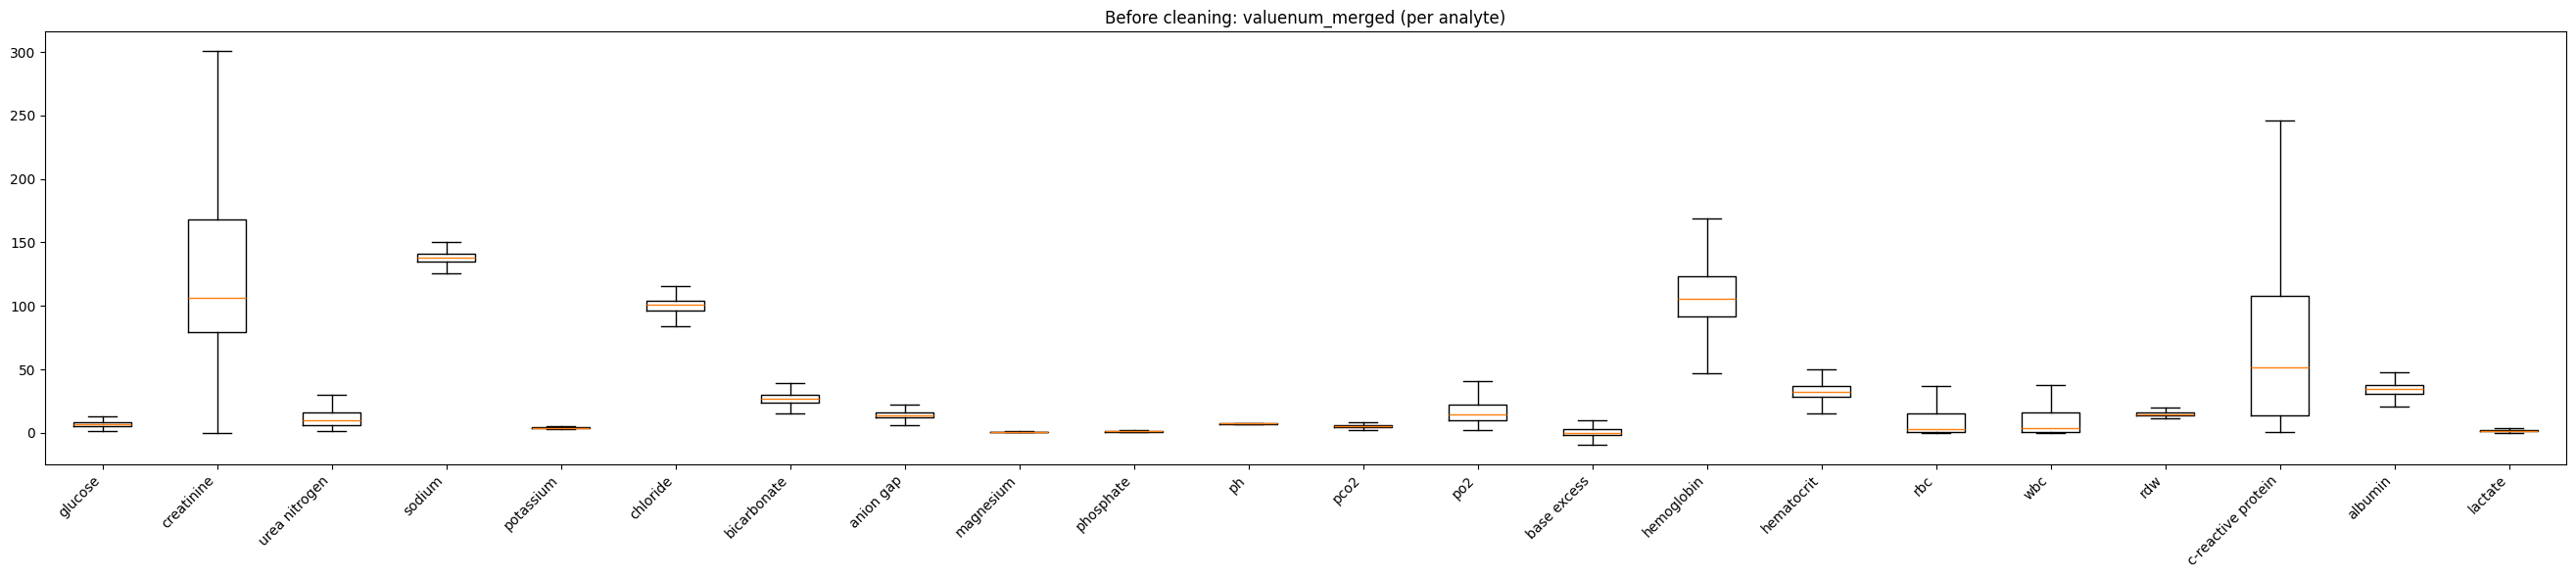


Removed / set to NaN (per analyte):
  glucose: 0 rows outside [0.5, 60]
  creatinine: 14 rows outside [10, 1500]
  urea nitrogen: 0 rows outside [0.5, 80]
  sodium: 4 rows outside [110, 170]
  potassium: 7 rows outside [1.5, 8.5]
  chloride: 7 rows outside [70, 130]
  bicarbonate: 91 rows outside [5, 45]
  anion gap: 8 rows outside [1, 40]
  magnesium: 14 rows outside [0.2, 3.0]
  phosphate: 307 rows outside [0.2, 2.5]
  ph: 2519 rows outside [6.8, 7.8]
  pco2: 7022 rows outside [10, 120]
  po2: 5031 rows outside [20, 500]
  base excess: 7 rows outside [-30, 25]
  hemoglobin: 1 rows outside [30, 230]
  hematocrit: 0 rows outside [5, 70]
  rbc: 726 rows outside [1, 8]
  wbc: 177 rows outside [0.1, 80]
  rdw: 0 rows outside [5, 30]
  c-reactive protein: 0 rows outside [0, 500]
  albumin: 0 rows outside [10, 60]
  lactate: 13 rows outside [0.1, 20]


C:\Users\dgars\AppData\Local\Temp\ipykernel_6500\82699508.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([a if len(a)>0 else [np.nan] for a in arrs_after], labels=vars_present, showfliers=False)


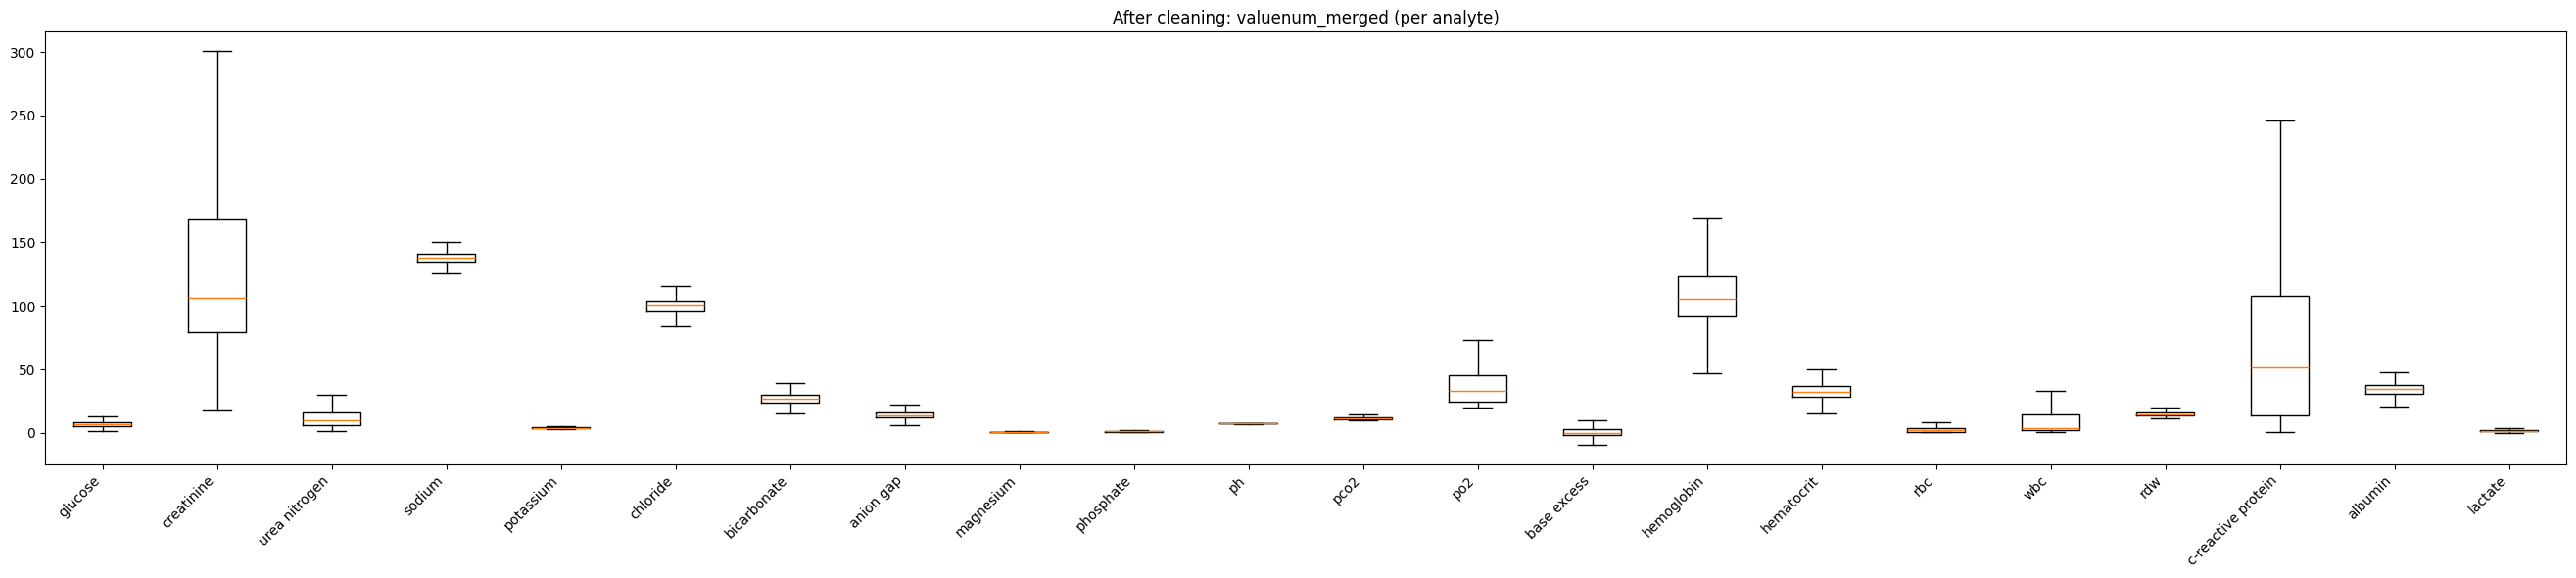


Counts before -> after (non-null valuenum_merged):
  glucose: 36394 -> 36394 (removed 0)
  creatinine: 35206 -> 35192 (removed 14)
  urea nitrogen: 34920 -> 34920 (removed 0)
  sodium: 35940 -> 35936 (removed 4)
  potassium: 37068 -> 37061 (removed 7)
  chloride: 35879 -> 35872 (removed 7)
  bicarbonate: 34255 -> 34164 (removed 91)
  anion gap: 34098 -> 34090 (removed 8)
  magnesium: 33171 -> 33157 (removed 14)
  phosphate: 28649 -> 28342 (removed 307)
  ph: 11089 -> 8570 (removed 2519)
  pco2: 7161 -> 139 (removed 7022)
  po2: 7194 -> 2163 (removed 5031)
  base excess: 7194 -> 7187 (removed 7)
  hemoglobin: 30351 -> 30350 (removed 1)
  hematocrit: 29976 -> 29976 (removed 0)
  rbc: 1797 -> 1071 (removed 726)
  wbc: 1780 -> 1603 (removed 177)
  rdw: 27737 -> 27737 (removed 0)
  c-reactive protein: 263 -> 263 (removed 0)
  albumin: 2266 -> 2266 (removed 0)
  lactate: 5494 -> 5481 (removed 13)


In [288]:
# Clean numeric lab values using PHYSIO_LIMITS: set valuenum_merged (and value where applicable) to NaN
df['label_norm'] = df['label'].astype(str).str.lower().str.strip()
physio_lower = {k.lower(): v for k, v in PHYSIO_LIMITS.items()}

# find which physio vars are present
vars_present = [v for v in physio_lower.keys() if v in df['label_norm'].unique()]
if not vars_present:
    print("No PHYSIO_LIMITS variables found in df['label'].")
else:
    print(f"Vars to check ({len(vars_present)}): {vars_present}")

    # helper to collect arrays for boxplot
    def arrays_for_vars(df_src, vars_list):
        arrs = []
        counts = []
        for v in vars_list:
            s = pd.to_numeric(df_src.loc[df_src['label_norm'] == v, 'valuenum_merged'], errors='coerce').dropna()
            arrs.append(s.values)
            counts.append(len(s))
        return arrs, counts

    # BEFORE
    arrs_before, counts_before = arrays_for_vars(df, vars_present)
    plt.figure(figsize=(max(6, len(vars_present)*1.2), 6))
    plt.boxplot([a if len(a)>0 else [np.nan] for a in arrs_before], labels=vars_present, showfliers=False)
    plt.xticks(rotation=45, ha='right')
    plt.title("Before cleaning: valuenum_merged (per analyte)")
    plt.tight_layout()
    plt.show()

    # Apply physio limits -> set out-of-range to NaN
    removed_summary = []
    for v in vars_present:
        low, high = physio_lower[v]
        mask = df['label_norm'] == v
        vals = pd.to_numeric(df.loc[mask, 'valuenum_merged'], errors='coerce')
        out_of_range = mask & vals.notna() & ((vals < low) | (vals > high))
        n_out = int(out_of_range.sum())
        removed_summary.append((v, low, high, n_out))
        # set numeric column to NaN where out of range
        df.loc[out_of_range, 'valuenum_merged'] = np.nan
        # also clear original textual 'value' for those rows to reflect cleaning
        df.loc[out_of_range, 'value'] = np.nan

    # report removals
    print("\nRemoved / set to NaN (per analyte):")
    for v, low, high, n in removed_summary:
        print(f"  {v}: {n} rows outside [{low}, {high}]")

    # AFTER
    arrs_after, counts_after = arrays_for_vars(df, vars_present)
    plt.figure(figsize=(max(6, len(vars_present)*1.2), 6))
    plt.boxplot([a if len(a)>0 else [np.nan] for a in arrs_after], labels=vars_present, showfliers=False)
    plt.xticks(rotation=45, ha='right')
    plt.title("After cleaning: valuenum_merged (per analyte)")
    plt.tight_layout()
    plt.show()

    # concise before/after counts
    print("\nCounts before -> after (non-null valuenum_merged):")
    for v, before_cnt, after_cnt in zip(vars_present, counts_before, counts_after):
        print(f"  {v}: {before_cnt} -> {after_cnt} (removed {before_cnt - after_cnt})")

## Save

In [289]:
df.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_cleaned.csv')}", index=False)

In [290]:
# load already cleaned to skip first steps
#df = pd.read_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_cleaned.csv')}")

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   hadm_id            978501 non-null  float64       
 1   charttime          978501 non-null  datetime64[ns]
 2   value              848796 non-null  object        
 3   valuenum           907317 non-null  float64       
 4   valueuom           881719 non-null  object        
 5   ref_range_lower    865544 non-null  float64       
 6   ref_range_upper    865544 non-null  float64       
 7   flag               978501 non-null  object        
 8   label              978501 non-null  object        
 9   fluid              978501 non-null  object        
 10  examination_group  978501 non-null  object        
 11  analysis_batch_id  978501 non-null  object        
 12  qc_flag            978501 non-null  object        
 13  ref_range          146215 non-null  object       

## Add subject id from df1, df3, and df4

In [292]:
# Load other _cleaned dataframes to get subject_id  
df1 = pd.read_csv(f"{DATA_DIR}/heart_diagnoses_1_cleaned.csv")
df3 = pd.read_csv(f"{DATA_DIR}/microbiology_events_codes_3_cleaned.csv")
df4 = pd.read_csv(f"{DATA_DIR}/procedure_code_4_cleaned.csv")

# Merge with Heart Diagnoses to get subject_id
df = df.merge(
    df1[['hadm_id', 'subject_id']].drop_duplicates(),
    on='hadm_id', how='left'
)
print(f"subject_id filled: {df['subject_id'].notna().sum():,} / {len(df):,}")
print(f"subject_id missing: {df['subject_id'].isna().sum():,}")

# Fill gaps from microbiology
df = df.merge(
    df3[['hadm_id', 'subject_id']].drop_duplicates(),
    on='hadm_id', how='left', suffixes=('', '_micro')
)
df['subject_id'] = df['subject_id'].fillna(df['subject_id_micro'])
df = df.drop(columns=['subject_id_micro'])

print(f"subject_id filled: {df['subject_id'].notna().sum():,} / {len(df):,}")
print(f"subject_id missing: {df['subject_id'].isna().sum():,}")

# Fill from procedures as last source
df = df.merge(
    df4[['hadm_id', 'subject_id']].drop_duplicates(),
    on='hadm_id', how='left', suffixes=('', '_proc')
)
df['subject_id'] = df['subject_id'].fillna(df['subject_id_proc'])
df = df.drop(columns=['subject_id_proc'])

# Summary
print(f"subject_id filled: {df['subject_id'].notna().sum():,} / {len(df):,}")
print(f"subject_id missing: {df['subject_id'].isna().sum():,}")

subject_id filled: 1,000,809 / 1,000,809
subject_id missing: 0
subject_id filled: 1,167,595 / 1,167,595
subject_id missing: 0
subject_id filled: 1,167,595 / 1,167,595
subject_id missing: 0


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167595 entries, 0 to 1167594
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   hadm_id            1167595 non-null  float64       
 1   charttime          1167595 non-null  datetime64[ns]
 2   value              1010209 non-null  object        
 3   valuenum           1079027 non-null  float64       
 4   valueuom           1047395 non-null  object        
 5   ref_range_lower    1024390 non-null  float64       
 6   ref_range_upper    1024390 non-null  float64       
 7   flag               1167595 non-null  object        
 8   label              1167595 non-null  object        
 9   fluid              1167595 non-null  object        
 10  examination_group  1167595 non-null  object        
 11  analysis_batch_id  1167595 non-null  object        
 12  qc_flag            1167595 non-null  object        
 13  ref_range          174401 n

In [294]:
df.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_cleaned.csv')}", index=False)

## Create features and slim version

In [295]:
df_slim = df.copy()

In [296]:
df_slim.columns

Index(['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom',
       'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid',
       'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range',
       'value_extracted', 'valuenum_merged', 'is_qc_fail', 'is_qc_warn',
       'is_qc_ok', 'flag_corrected', 'label_norm', 'subject_id'],
      dtype='object')

# Task 1.2 Create features
- var for exams
- var for charttime?
- var for dod (is_dead?), anchor_year?

In [297]:
df_slim = df_slim.sort_values(['subject_id', 'hadm_id', 'charttime'])
gb = df_slim.groupby(['subject_id', 'hadm_id'])

## Features:

In [298]:
# True if any unique examination_group equals 'microbiology' (case-insensitive)
is_microbiology_present = any(str(i).lower() == 'microbiology' for i in df_slim['examination_group'].unique())
is_microbiology_present

False

In [299]:
feat_count = gb.size().rename('num_labs')

In [300]:
feat_abnormal = gb['flag_corrected'].apply(
    lambda x: (x == 'abnormal').mean()
).rename('abnormal_ratio')

In [301]:
feat_qc_fail_rate = gb['is_qc_fail'].mean().rename('qc_fail_ratio')

In [311]:
# List of all variables needed for the composite scores
required_vars = [
    "glucose", "lactate", "anion gap", "bicarbonate",
    "creatinine", "urea nitrogen", "phosphate", "potassium",
    "pO2", "pCO2", "pH", "base excess",
    "c-reactive protein", "ast", "alt", "ld",
    "hemoglobin", "hematocrit", "rbc", "rdw", "sodium", 
]
 #max_base_excess      , crp, anion_gap
def extract_lab_features(group):
    """Aggregate key lab tests for a patient-admission group."""
    def get_max(label):
        mask = group['label'].str.contains(label, case=False, na=False)
        vals = group.loc[mask, 'valuenum_merged']
        return vals.max() if len(vals) > 0 else np.nan
    
    def get_min(label):
        mask = group['label'].str.contains(label, case=False, na=False)
        vals = group.loc[mask, 'valuenum_merged']
        return vals.min() if len(vals) > 0 else np.nan
    
    # Aggregate all required variables
    feature_dict = {}
    for var in required_vars:
        feature_dict[f"max_{var}"] = get_max(var)
        feature_dict[f"min_{var}"] = get_min(var)
    
    return pd.Series(feature_dict)

# Apply per patient-admission
feat_labs = gb.apply(extract_lab_features).reset_index()


C:\Users\dgars\AppData\Local\Temp\ipykernel_6500\1347117631.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feat_labs = gb.apply(extract_lab_features).reset_index()


In [312]:
feat_labs.head(2)

,subject_id,hadm_id,max_glucose,min_glucose,max_lactate,min_lactate,max_anion gap,min_anion gap,max_bicarbonate,min_bicarbonate,...,max_hemoglobin,min_hemoglobin,max_hematocrit,min_hematocrit,max_rbc,min_rbc,max_rdw,min_rdw,max_sodium,min_sodium
0,10000980,26913865.0,9.0465,4.551,NaN,NaN,17.0,13.0,25.0,22.0,...,101.0,6.8,30.8,23.6,NaN,NaN,13.4,12.9,143.0,139.0
1,10000980,29654838.0,7.6590,5.328,NaN,NaN,19.0,15.0,26.0,20.0,...,99.0,8.1,31.4,29.8,NaN,NaN,14.6,14.5,146.0,144.0


In [313]:
feat_qc_fail_rate.head(2)

subject_id  hadm_id   
10000980    26913865.0    0.024096
            29654838.0    0.000000
Name: qc_fail_ratio, dtype: float64

In [314]:
feat_time_span = (
    (gb['charttime'].max() - gb['charttime'].min())
    .dt.total_seconds() / 3600
).rename('lab_time_span_hours')


In [315]:
feat_unique_tests = gb['label'].nunique().rename('unique_lab_tests')
feat_unique_groups = gb['examination_group'].nunique().rename('unique_examination_groups')
feat_unique_fluids = gb['fluid'].nunique().rename('fluid_diversity')
feat_unique_batches = gb['analysis_batch_id'].nunique().rename('unique_analysis_batches')

In [316]:
parts = [
    feat_count.reset_index(),         # was a Series with MultiIndex
    feat_abnormal.reset_index(),
    feat_qc_fail_rate.reset_index(),
    feat_labs,                        # already reset_index()
    feat_time_span.reset_index(),
    feat_unique_tests.reset_index(),
    feat_unique_groups.reset_index(),
    feat_unique_fluids.reset_index(),
    feat_unique_batches.reset_index()
]

from functools import reduce
feat = reduce(lambda L, R: pd.merge(L, R, on=['subject_id','hadm_id'], how='outer'), parts)
feat['has_labs'] = 1
feat.head()

,subject_id,hadm_id,num_labs,abnormal_ratio,qc_fail_ratio,max_glucose,min_glucose,max_lactate,min_lactate,max_anion gap,...,max_rdw,min_rdw,max_sodium,min_sodium,lab_time_span_hours,unique_lab_tests,unique_examination_groups,fluid_diversity,unique_analysis_batches,has_labs
0,10000980,26913865.0,166,0.0,0.024096,9.0465,4.5510,NaN,NaN,17.0,...,13.4,12.9,143.0,139.0,140.466667,45,12,1,136,1
1,10000980,29654838.0,59,0.0,0.000000,7.6590,5.3280,NaN,NaN,19.0,...,14.6,14.5,146.0,144.0,33.433333,35,8,1,53,1
2,10002013,24760295.0,50,0.0,0.000000,21.9225,20.6460,NaN,NaN,14.0,...,13.2,13.0,136.0,135.0,31.183333,26,5,1,43,1
3,10002155,23822395.0,397,0.0,0.030227,7.7700,5.2725,NaN,NaN,14.0,...,15.2,14.1,143.0,24.0,325.400000,56,9,2,191,1
4,10004457,28723315.0,25,0.0,0.040000,5.1060,5.1060,NaN,NaN,10.0,...,14.2,14.2,NaN,NaN,0.000000,25,4,1,22,1


In [317]:
feat.isna().sum()

subject_id                      0
hadm_id                         0
num_labs                        0
abnormal_ratio                  0
qc_fail_ratio                   0
max_glucose                    32
min_glucose                    32
max_lactate                  2834
min_lactate                  2834
max_anion gap                  31
min_anion gap                  31
max_bicarbonate                31
min_bicarbonate                31
max_creatinine                 19
min_creatinine                 19
max_urea nitrogen              18
min_urea nitrogen              18
max_phosphate                 217
min_phosphate                 217
max_potassium                  17
min_potassium                  17
max_pO2                      4275
min_pO2                      4275
max_pCO2                     4803
min_pCO2                     4803
max_pH                        142
min_pH                        142
max_base excess              3654
min_base excess              3654
max_c-reactive

### Corr

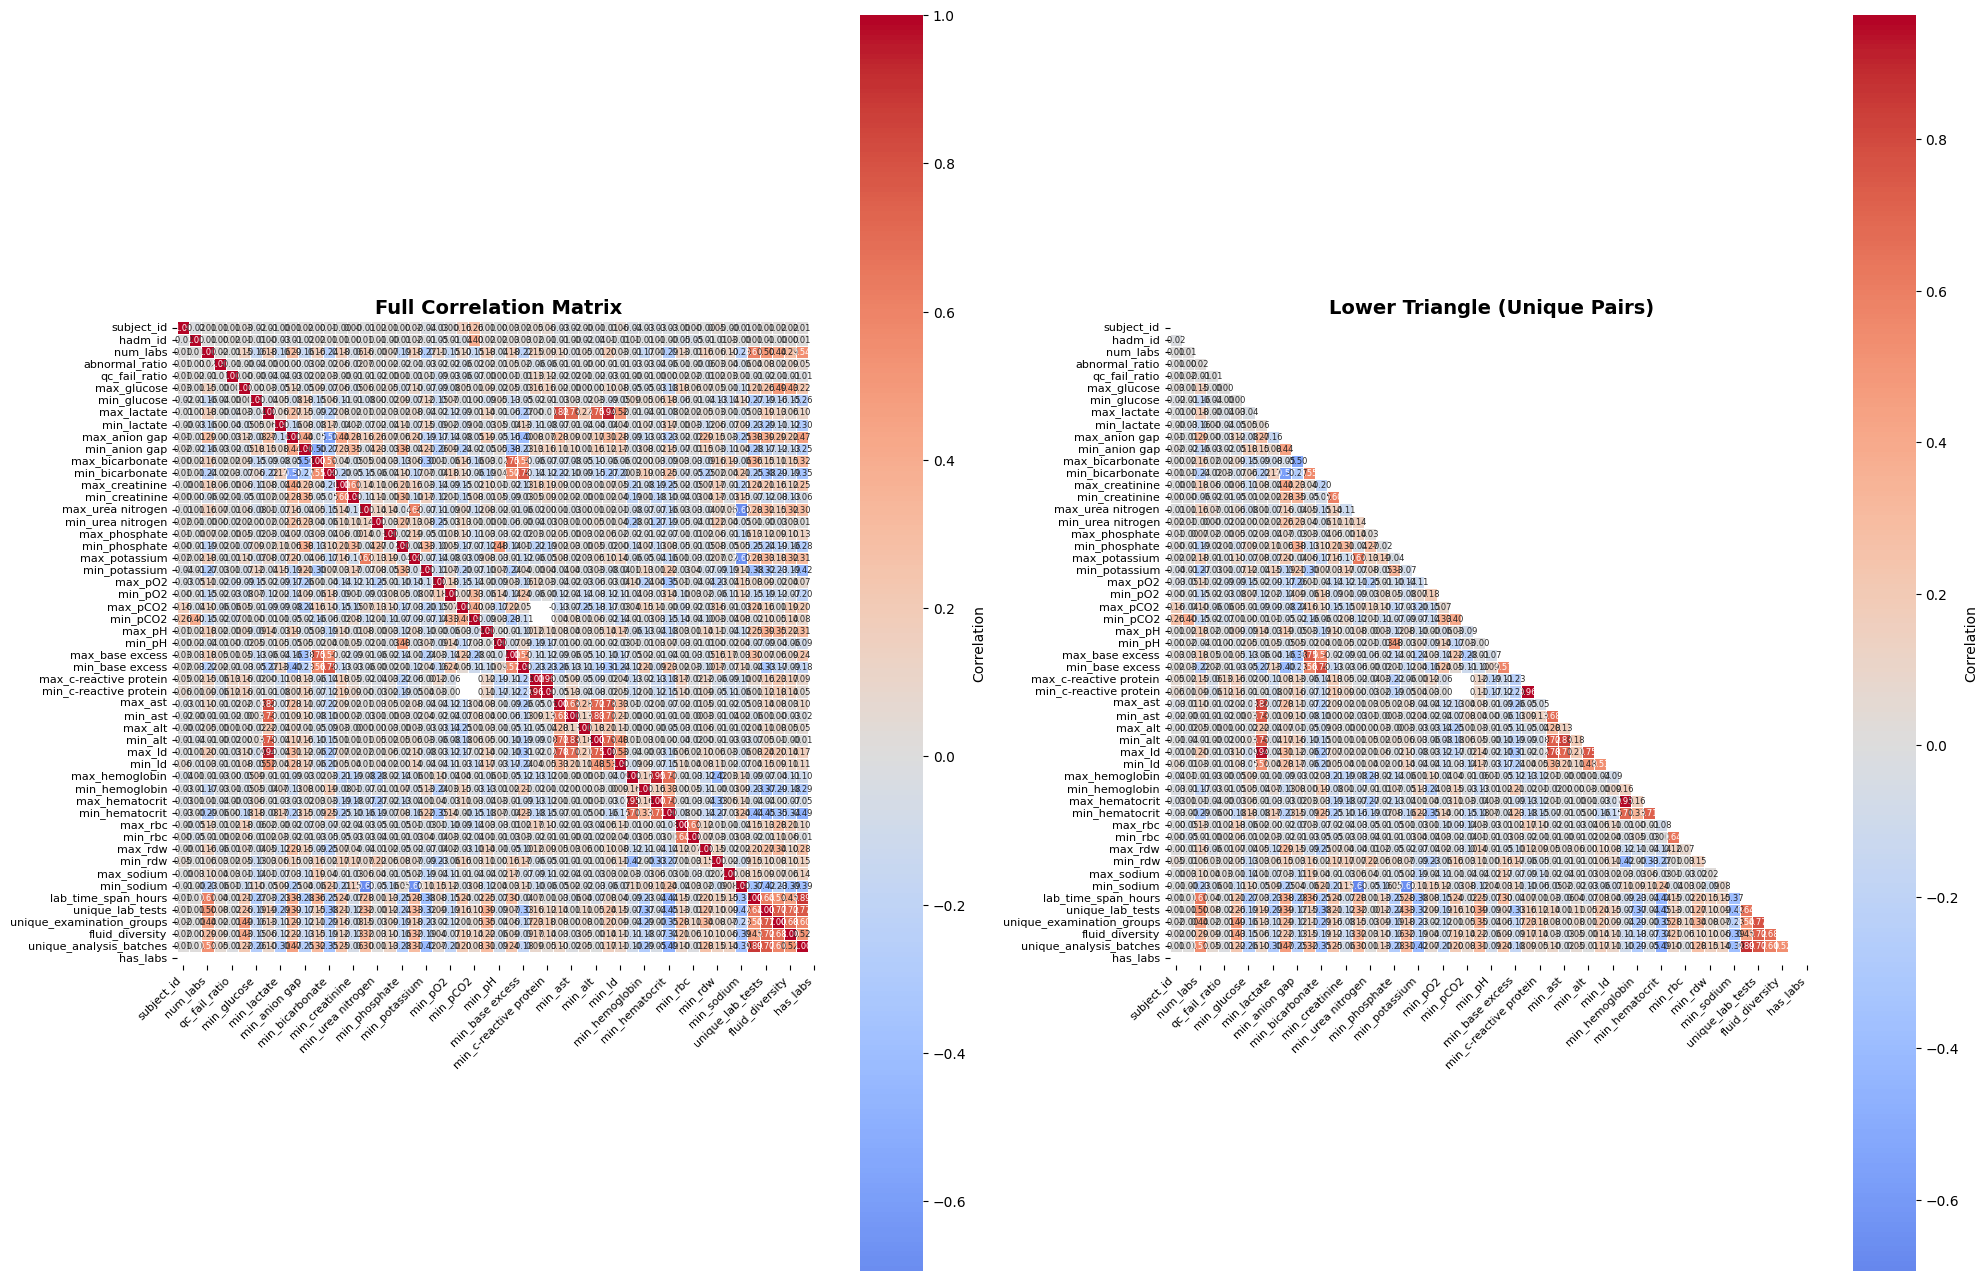

STRONG CORRELATIONS (|r| > 0.7, excluding self-correlations)

Found 17 highly correlated pairs:



,Variable 1,Variable 2,Correlation,Strength
6,max_c-reactive protein,min_c-reactive protein,0.964,Very Strong
11,max_hemoglobin,max_hematocrit,0.945,Very Strong
3,max_lactate,max_ld,0.942,Very Strong
13,lab_time_span_hours,unique_analysis_batches,0.886,Strong
9,min_ast,min_alt,0.829,Strong
0,max_lactate,max_ast,0.819,Strong
8,max_ast,max_ld,0.784,Strong
5,min_bicarbonate,min_base excess,0.776,Strong
16,unique_lab_tests,unique_analysis_batches,0.775,Strong
14,unique_lab_tests,unique_examination_groups,0.770,Strong



💡 Consider removing one variable from each pair to reduce multicollinearity

MODERATE CORRELATIONS (0.5 < |r| ≤ 0.7)

Found 24 moderately correlated pairs:



,Variable 1,Variable 2,Correlation
15,min_ast,max_ld,0.699
17,max_hemoglobin,min_hematocrit,0.695
11,max_urea nitrogen,min_sodium,-0.694
21,unique_examination_groups,fluid_diversity,0.683
14,max_ast,min_ast,0.678
12,max_potassium,min_sodium,-0.659
19,lab_time_span_hours,unique_lab_tests,0.641
18,max_rbc,min_rbc,0.638
10,max_urea nitrogen,max_potassium,0.620
0,num_labs,lab_time_span_hours,0.614


In [318]:
numeric_cols = feat.select_dtypes(include='number').columns
corr = feat[numeric_cols].corr()

# Create figure with two views
fig, axes = plt.subplots(1, 2, figsize=(20, 16))

# Plot 1: Full heatmap with annotations
ax1 = axes[0]
sns.heatmap(corr, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            annot_kws={'size': 6},
            cbar_kws={'label': 'Correlation', 'shrink': 0.8},
            ax=ax1)
ax1.set_title('Full Correlation Matrix', fontsize=14, fontweight='bold')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(ax1.get_yticklabels(), rotation=0, fontsize=8)

# Plot 2: Lower triangle only (cleaner view)
ax2 = axes[1]
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            mask=mask,
            annot_kws={'size': 6},
            cbar_kws={'label': 'Correlation', 'shrink': 0.8},
            ax=ax2)
ax2.set_title('Lower Triangle (Unique Pairs)', fontsize=14, fontweight='bold')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(ax2.get_yticklabels(), rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig(r'../plots/1.1_df2_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Find and display strong correlations
print("="*80)
print("STRONG CORRELATIONS (|r| > 0.7, excluding self-correlations)")
print("="*80)

strong_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        r = corr.iloc[i, j]
        if abs(r) > 0.7:
            strong_corr.append({
                'Variable 1': corr.columns[i],
                'Variable 2': corr.columns[j],
                'Correlation': round(r, 3),
                'Strength': 'Very Strong' if abs(r) > 0.9 else 'Strong'
            })

if strong_corr:
    strong_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
    print(f"\nFound {len(strong_corr)} highly correlated pairs:\n")
    display(strong_df)
    print("\n💡 Consider removing one variable from each pair to reduce multicollinearity")
else:
    print("\nNo correlations with |r| > 0.7 found")

# Moderate correlations
print("\n" + "="*80)
print("MODERATE CORRELATIONS (0.5 < |r| ≤ 0.7)")
print("="*80)

moderate_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        r = corr.iloc[i, j]
        if 0.5 < abs(r) <= 0.7:
            moderate_corr.append({
                'Variable 1': corr.columns[i],
                'Variable 2': corr.columns[j],
                'Correlation': round(r, 3)
            })

if moderate_corr:
    moderate_df = pd.DataFrame(moderate_corr).sort_values('Correlation', key=abs, ascending=False)
    print(f"\nFound {len(moderate_corr)} moderately correlated pairs:\n")
    display(moderate_df)
else:
    print("\nNo moderate correlations found")

In [319]:
len(feat.columns), feat.columns

(53,
 Index(['subject_id', 'hadm_id', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
        'max_glucose', 'min_glucose', 'max_lactate', 'min_lactate',
        'max_anion gap', 'min_anion gap', 'max_bicarbonate', 'min_bicarbonate',
        'max_creatinine', 'min_creatinine', 'max_urea nitrogen',
        'min_urea nitrogen', 'max_phosphate', 'min_phosphate', 'max_potassium',
        'min_potassium', 'max_pO2', 'min_pO2', 'max_pCO2', 'min_pCO2', 'max_pH',
        'min_pH', 'max_base excess', 'min_base excess',
        'max_c-reactive protein', 'min_c-reactive protein', 'max_ast',
        'min_ast', 'max_alt', 'min_alt', 'max_ld', 'min_ld', 'max_hemoglobin',
        'min_hemoglobin', 'max_hematocrit', 'min_hematocrit', 'max_rbc',
        'min_rbc', 'max_rdw', 'min_rdw', 'max_sodium', 'min_sodium',
        'lab_time_span_hours', 'unique_lab_tests', 'unique_examination_groups',
        'fluid_diversity', 'unique_analysis_batches', 'has_labs'],
       dtype='object'))

In [320]:
# Keep identifiers + common aggregates, and include all min_/max_ lab vars automatically
base_keep = [
    'subject_id', 'hadm_id',
    'num_labs',
    'abnormal_ratio',
    'qc_fail_ratio',
    'lab_time_span_hours', 'unique_lab_tests',
    'has_labs'
]

# automatically include any min_ or max_ columns produced by feat_labs aggregation
minmax_cols = [c for c in feat.columns if c.startswith('min_') or c.startswith('max_')]

features_to_keep = base_keep + minmax_cols

# Filter to only keep columns that exist in feat (defensive)
features_to_keep = [col for col in features_to_keep if col in feat.columns]

feat_reduced = feat[features_to_keep]

print(f"Reduced from {len(feat.columns)} to {len(feat_reduced.columns)} columns (kept {len(minmax_cols)} min/max cols)")
feat_reduced.columns

Reduced from 53 to 50 columns (kept 42 min/max cols)


Index(['subject_id', 'hadm_id', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
       'lab_time_span_hours', 'unique_lab_tests', 'has_labs', 'max_glucose',
       'min_glucose', 'max_lactate', 'min_lactate', 'max_anion gap',
       'min_anion gap', 'max_bicarbonate', 'min_bicarbonate', 'max_creatinine',
       'min_creatinine', 'max_urea nitrogen', 'min_urea nitrogen',
       'max_phosphate', 'min_phosphate', 'max_potassium', 'min_potassium',
       'max_pO2', 'min_pO2', 'max_pCO2', 'min_pCO2', 'max_pH', 'min_pH',
       'max_base excess', 'min_base excess', 'max_c-reactive protein',
       'min_c-reactive protein', 'max_ast', 'min_ast', 'max_alt', 'min_alt',
       'max_ld', 'min_ld', 'max_hemoglobin', 'min_hemoglobin',
       'max_hematocrit', 'min_hematocrit', 'max_rbc', 'min_rbc', 'max_rdw',
       'min_rdw', 'max_sodium', 'min_sodium'],
      dtype='object')

In [321]:
feat_reduced.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_agg_features_large.csv')}", index=False)

In [ ]:
# features_to_keep = [
#         # identifiers
#         'subject_id', 'hadm_id', 
#         'num_labs',
#         'abnormal_ratio',
#         'qc_fail_ratio',
#         'lab_time_span_hours',
#         'unique_lab_tests',
#         'max_glucose', 
#         'max_creatinine',
#         'min_hemoglobin', 'max_potassium', 'max_sodium', 
#         'has_labs'
#     ]

# # Filter to only keep columns that exist in feat
# features_to_keep = [col for col in features_to_keep if col in feat_reduced.columns]
# feat_reduced = feat_reduced[features_to_keep]

# print(f"Reduced to {len(feat_reduced.columns)} columns")
# feat_reduced.columns

Reduced to 13 columns


Index(['subject_id', 'hadm_id', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
       'lab_time_span_hours', 'unique_lab_tests', 'max_glucose',
       'max_creatinine', 'min_hemoglobin', 'max_potassium', 'max_sodium',
       'has_labs'],
      dtype='object')

## Save SLim

In [323]:
feat_reduced.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_agg_features.csv')}", index=False)

In [324]:
feat_reduced.describe()

,subject_id,hadm_id,num_labs,abnormal_ratio,qc_fail_ratio,lab_time_span_hours,unique_lab_tests,has_labs,max_glucose,min_glucose,...,max_hemoglobin,min_hemoglobin,max_hematocrit,min_hematocrit,max_rbc,min_rbc,max_rdw,min_rdw,max_sodium,min_sodium
count,4.855000e+03,4.855000e+03,4855.000000,4855.000000,4855.000000,4855.000000,4855.000000,4855.0,4823.000000,4823.000000,...,4807.000000,4807.000000,4825.000000,4825.000000,1004.000000,1004.000000,4807.000000,4807.000000,4827.000000,4827.000000
mean,1.510805e+07,2.501709e+07,240.493306,0.000086,0.020154,115.134343,47.647168,1.0,14.167228,5.463994,...,122.663033,85.390971,37.373451,32.514756,8760.829681,3819.909363,23.993073,14.557416,141.070851,124.630619
std,2.939544e+06,2.874953e+06,513.277369,0.000800,0.014587,111.872999,21.559055,0.0,31.014046,1.668278,...,20.089755,46.308441,5.519217,6.703981,62736.961835,40348.783846,15.799367,1.908098,3.640490,31.924754
min,1.000098e+07,2.000446e+07,3.000000,0.000000,0.000000,0.000000,3.000000,1.0,2.553000,0.000000,...,4.800000,0.000000,19.000000,0.000000,0.000000,0.000000,11.400000,11.200000,122.000000,10.000000
25%,1.251722e+07,2.260072e+07,79.000000,0.000000,0.011236,44.233333,31.000000,1.0,6.382500,4.606500,...,108.000000,71.500000,33.400000,28.000000,1.000000,1.000000,14.000000,13.300000,139.000000,132.000000
50%,1.507734e+07,2.503202e+07,136.000000,0.000000,0.019002,81.100000,43.000000,1.0,8.269500,5.161500,...,122.000000,99.000000,37.300000,32.800000,3.000000,2.000000,15.500000,14.100000,141.000000,136.000000
75%,1.765293e+07,2.746949e+07,259.000000,0.000000,0.027141,149.150000,60.000000,1.0,11.599500,5.938500,...,137.000000,119.000000,41.200000,37.200000,7.000000,4.000000,38.350000,15.400000,143.000000,139.000000
max,1.999860e+07,2.999967e+07,22580.000000,0.019802,0.285714,1257.800000,175.000000,1.0,1190.000000,24.531000,...,201.000000,182.000000,61.200000,55.000000,886449.000000,799243.000000,100.000000,46.300000,212.000000,152.000000


## Check new vars for distr (box plots) => outliers, etc

Numeric features: ['num_labs', 'abnormal_ratio', 'qc_fail_ratio', 'lab_time_span_hours', 'unique_lab_tests', 'has_labs', 'max_glucose', 'min_glucose', 'max_lactate', 'min_lactate', 'max_anion gap', 'min_anion gap', 'max_bicarbonate', 'min_bicarbonate', 'max_creatinine', 'min_creatinine', 'max_urea nitrogen', 'min_urea nitrogen', 'max_phosphate', 'min_phosphate', 'max_potassium', 'min_potassium', 'max_pO2', 'min_pO2', 'max_pCO2', 'min_pCO2', 'max_pH', 'min_pH', 'max_base excess', 'min_base excess', 'max_c-reactive protein', 'min_c-reactive protein', 'max_ast', 'min_ast', 'max_alt', 'min_alt', 'max_ld', 'min_ld', 'max_hemoglobin', 'min_hemoglobin', 'max_hematocrit', 'min_hematocrit', 'max_rbc', 'min_rbc', 'max_rdw', 'min_rdw', 'max_sodium', 'min_sodium']


,feature,n,min,median,max,q1,q3,iqr,lower_th,upper_th,p01,p99,n_outliers,frac_outliers
42,max_rbc,1004,0.0000,3.000000,886449.000000,1.000000,7.000000,6.000000,-8.000000,16.000000,1.000000,262386.110000,170,0.169323
16,max_urea nitrogen,4837,1.4280,9.996000,1612.000000,6.783000,18.564000,11.781000,-10.888500,36.235500,3.213000,977.640000,688,0.142237
47,min_sodium,4827,10.0000,136.000000,152.000000,132.000000,139.000000,7.000000,121.500000,149.500000,13.000000,144.000000,673,0.139424
20,max_potassium,4838,1.6000,4.600000,99.000000,4.300000,5.100000,0.800000,3.100000,6.300000,3.600000,68.000000,595,0.122985
34,max_alt,2065,2.0000,26.000000,61854.000000,16.000000,48.000000,32.000000,-32.000000,96.000000,7.000000,1595.720000,245,0.118644
32,max_ast,2322,0.9000,30.000000,20555.000000,20.000000,57.000000,37.000000,-35.500000,112.500000,1.000000,1844.530000,275,0.118432
43,min_rbc,1004,0.0000,2.000000,799243.000000,1.000000,4.000000,3.000000,-3.500000,8.500000,1.000000,47622.500000,103,0.102590
14,max_creatinine,4836,17.6800,106.080000,4757.500000,88.400000,167.960000,79.560000,-30.940000,287.300000,53.040000,850.824000,468,0.096774
35,min_alt,2065,2.0000,22.000000,5060.000000,15.000000,37.000000,22.000000,-18.000000,70.000000,5.000000,349.000000,176,0.085230
6,max_glucose,4823,2.5530,8.269500,1190.000000,6.382500,11.599500,5.217000,-1.443000,19.425000,4.606500,140.000000,382,0.079204


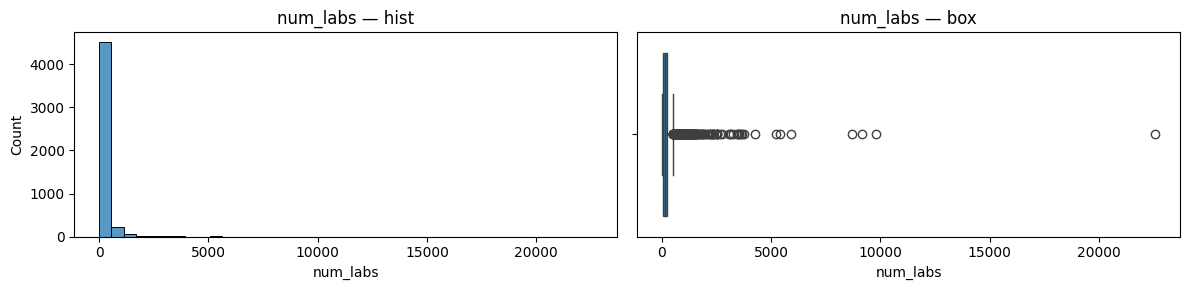

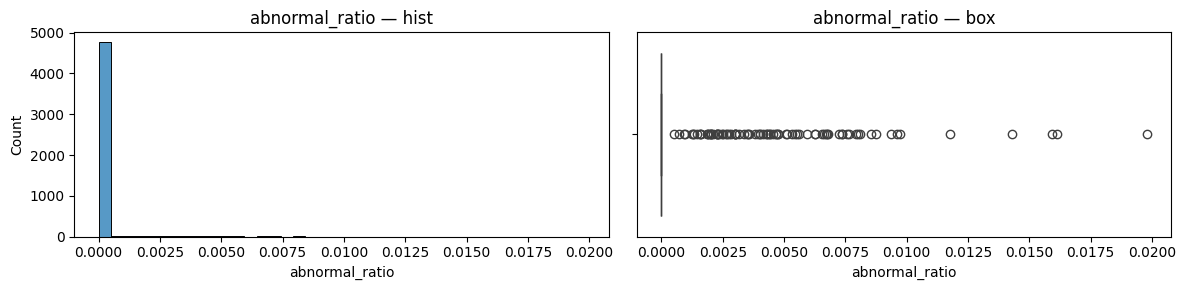

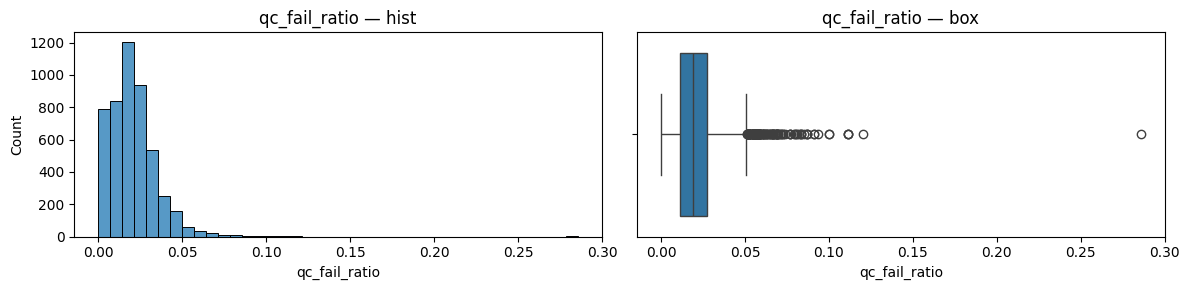

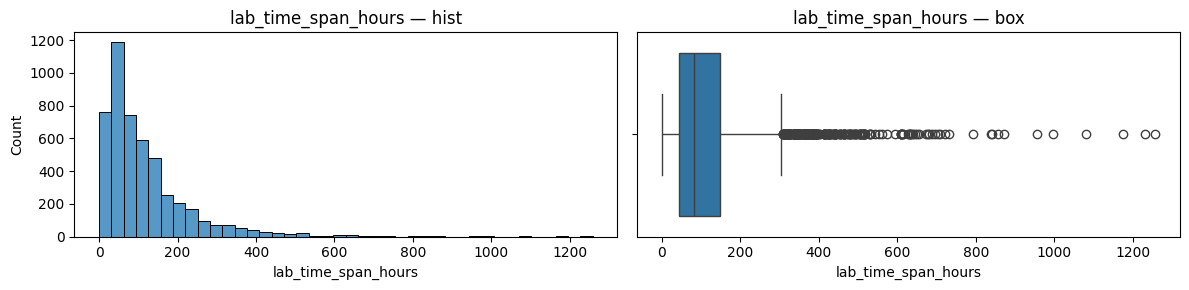

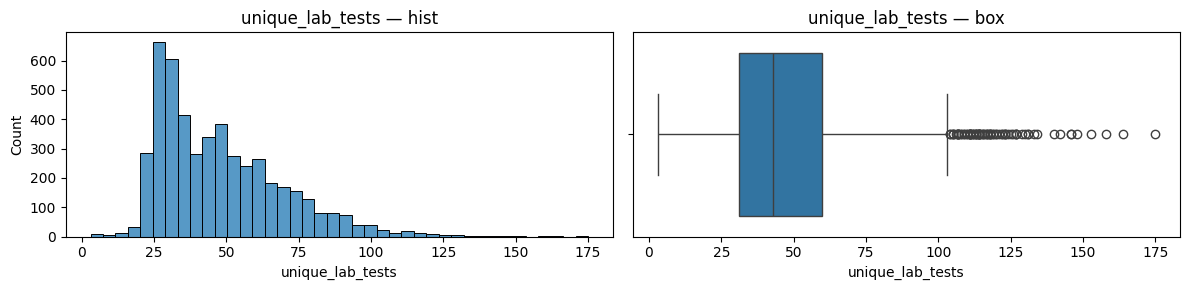

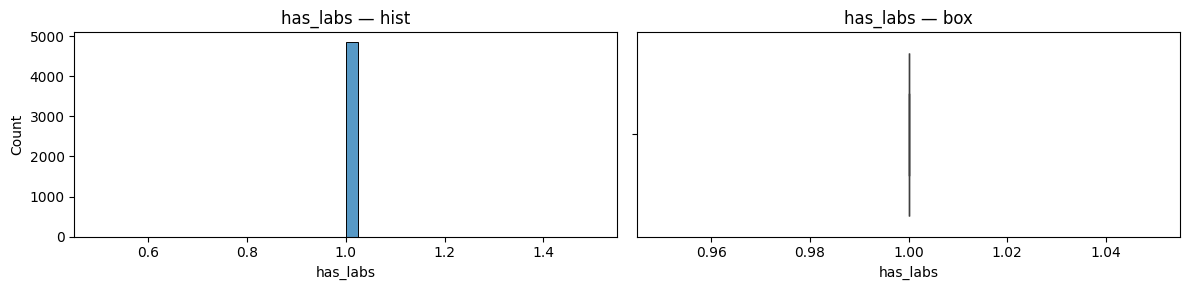

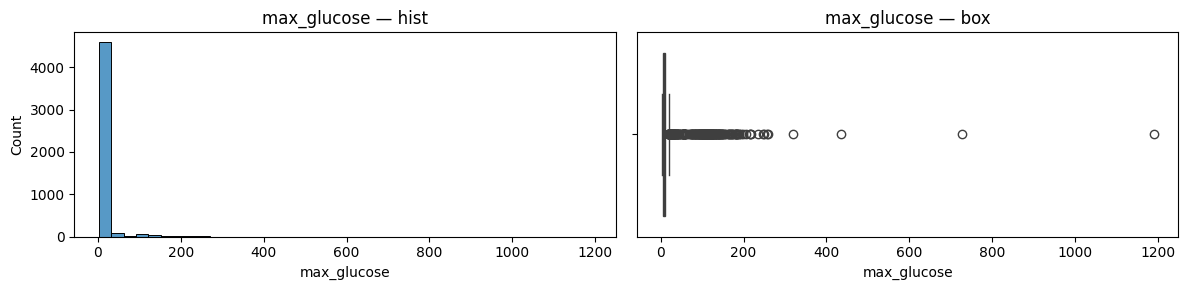

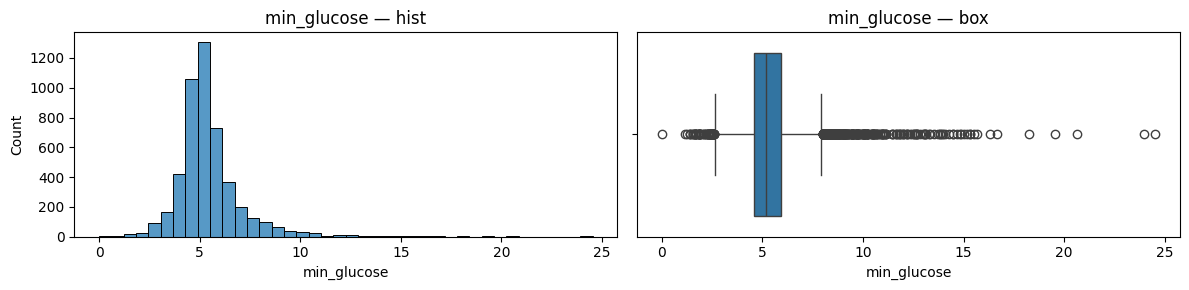

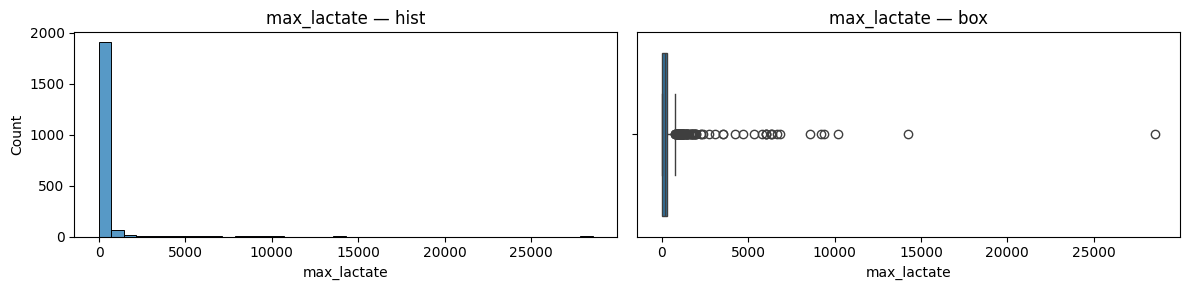

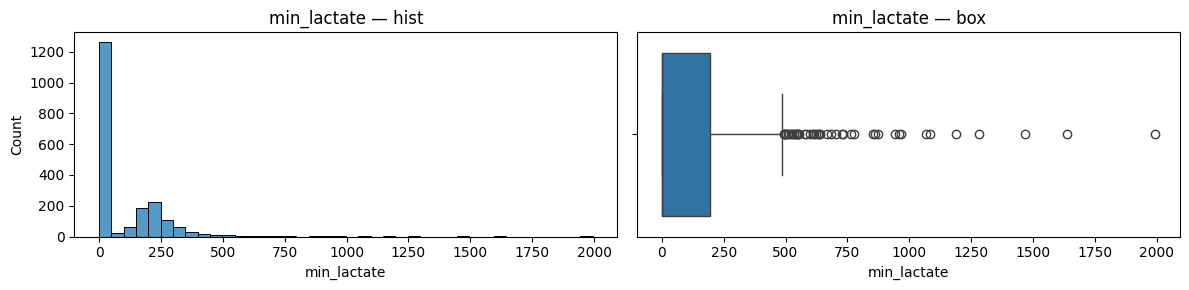

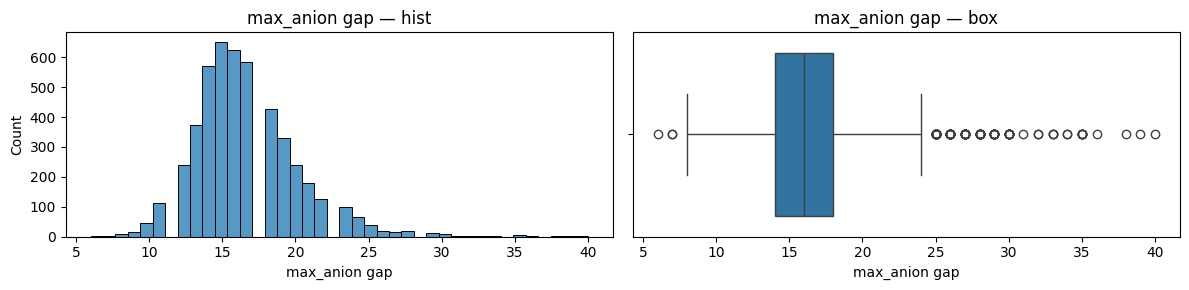

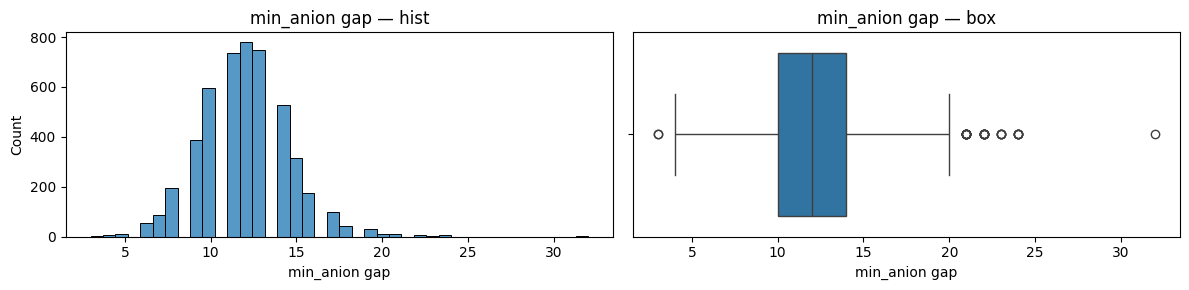

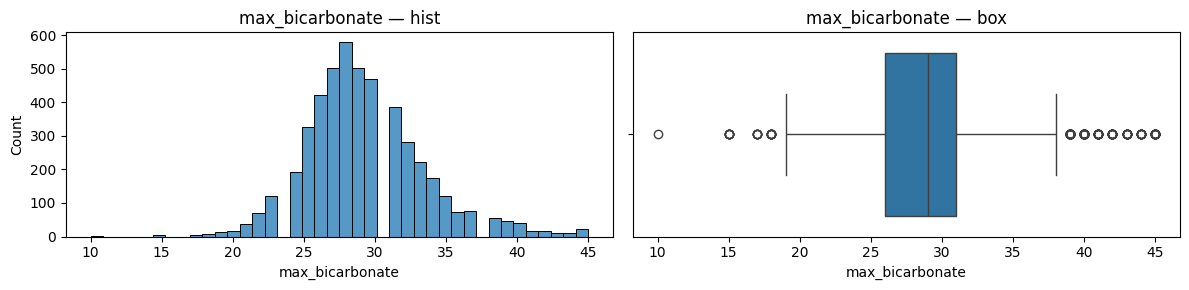

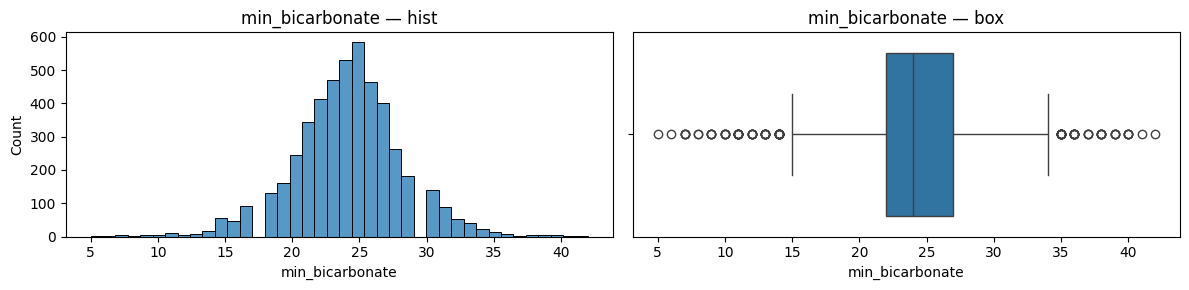

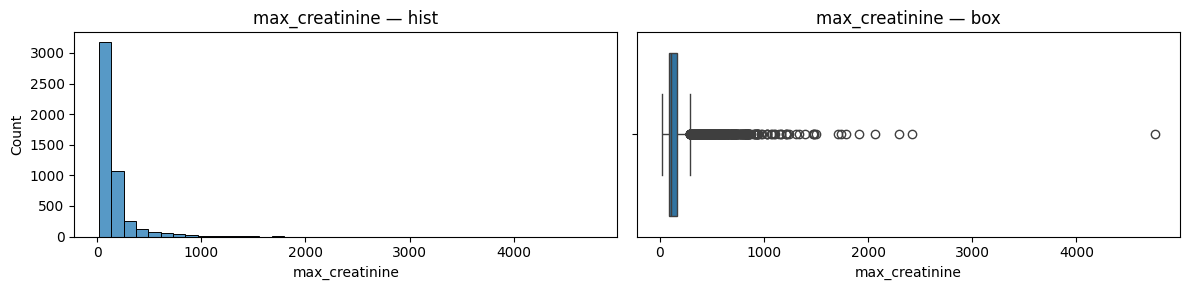

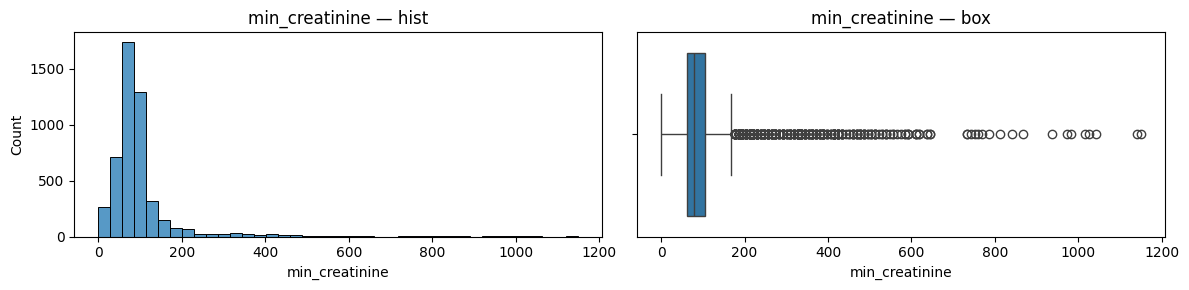

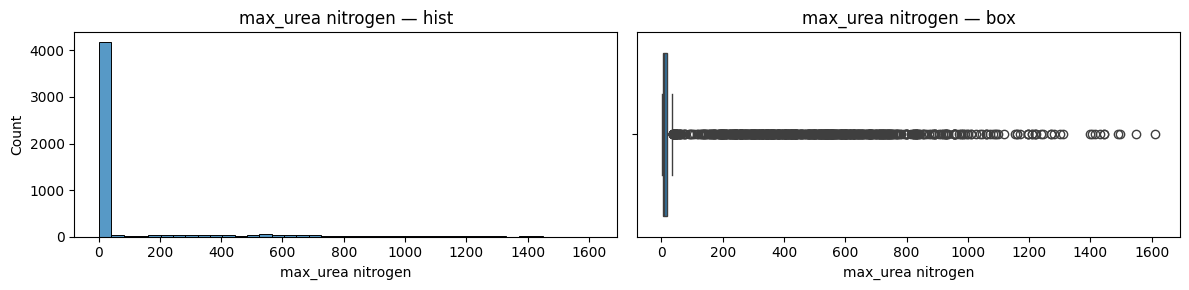

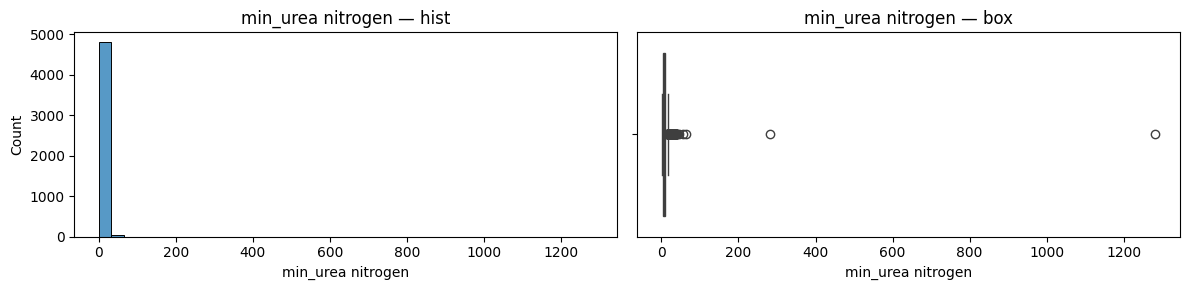

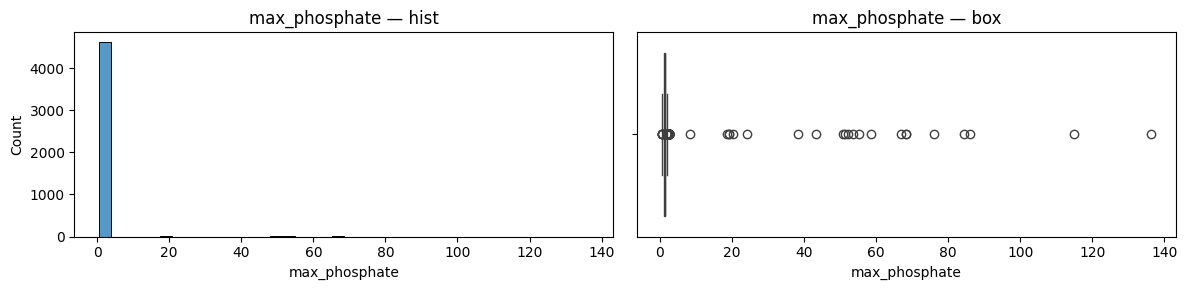

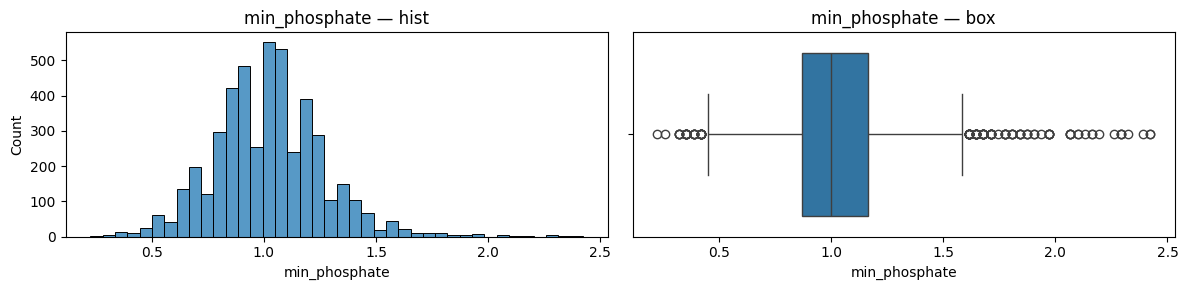

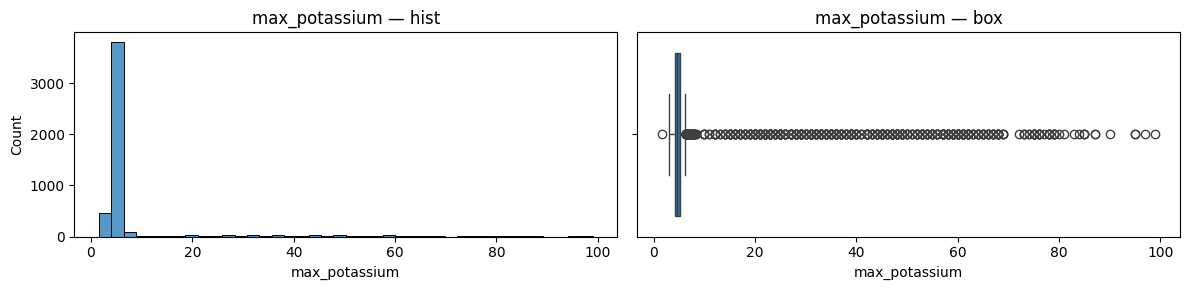

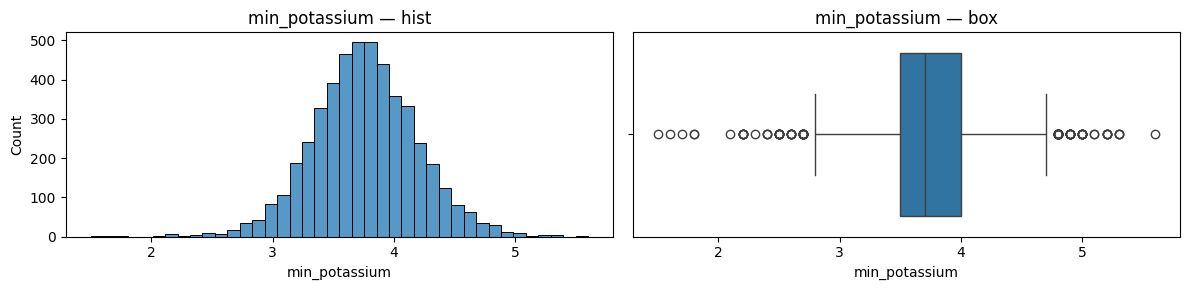

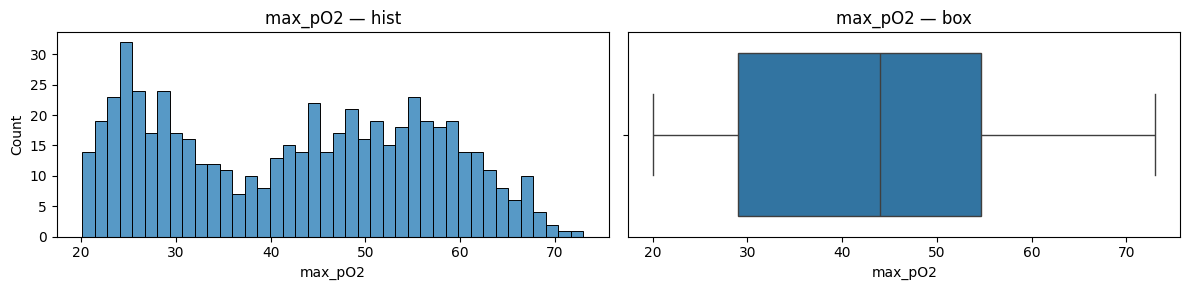

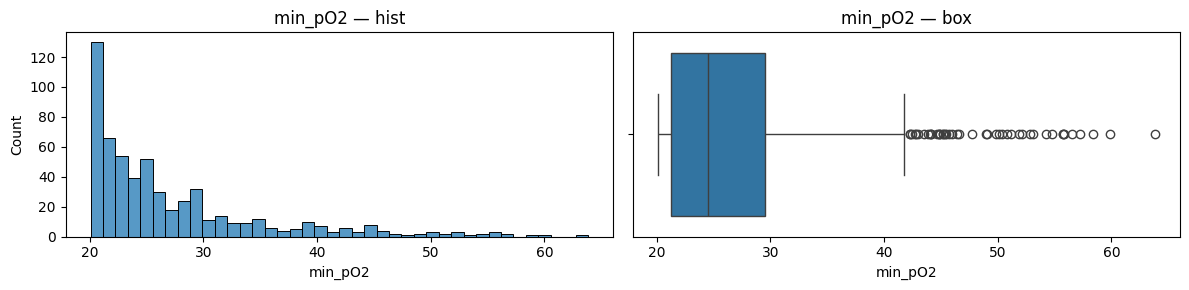

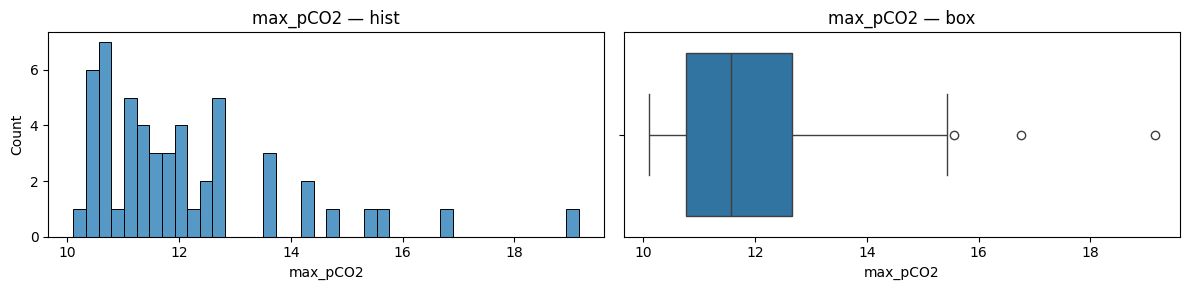

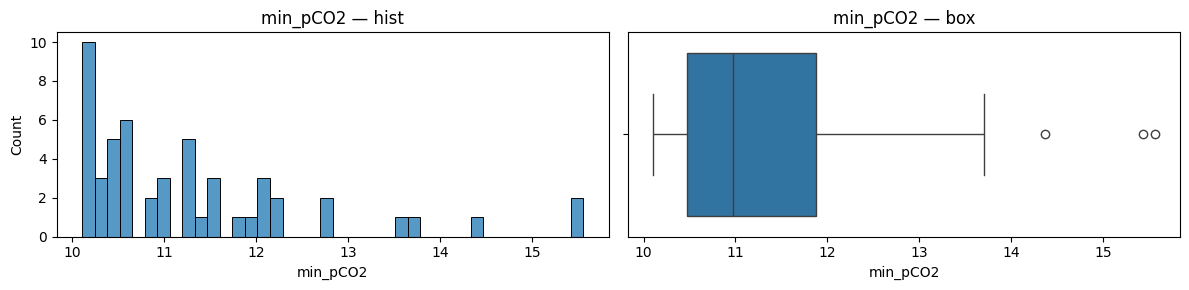

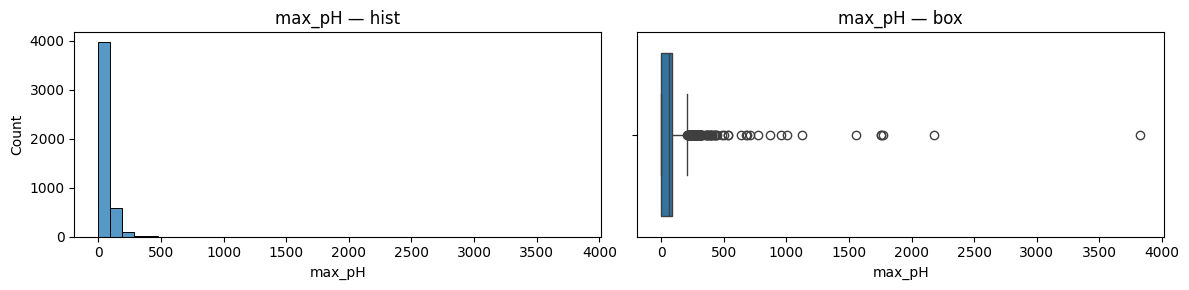

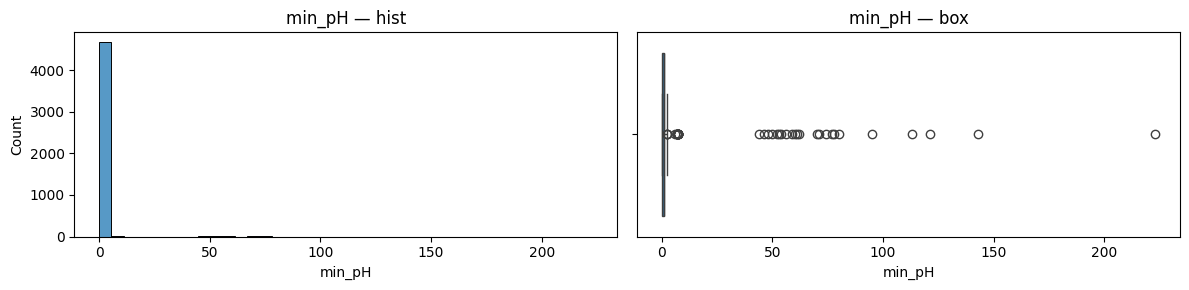

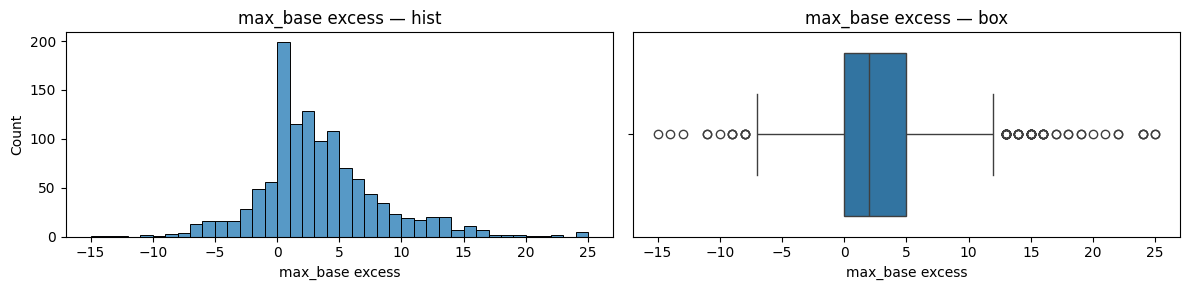

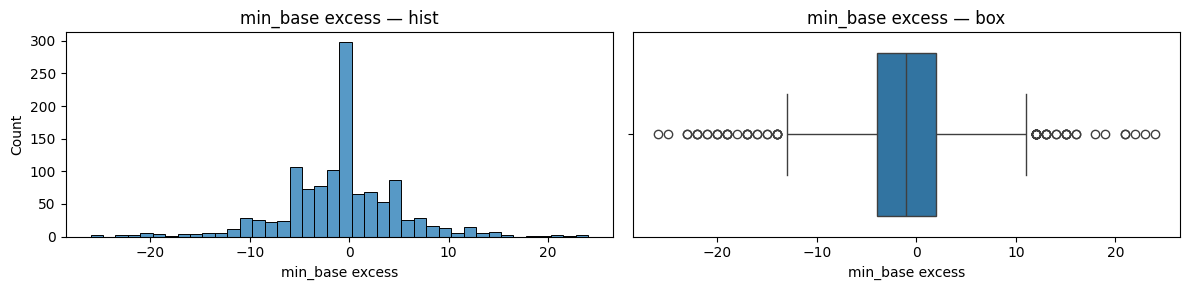

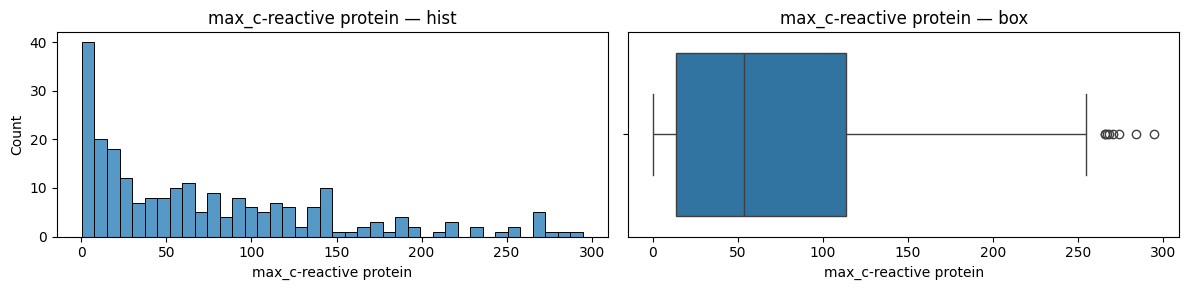

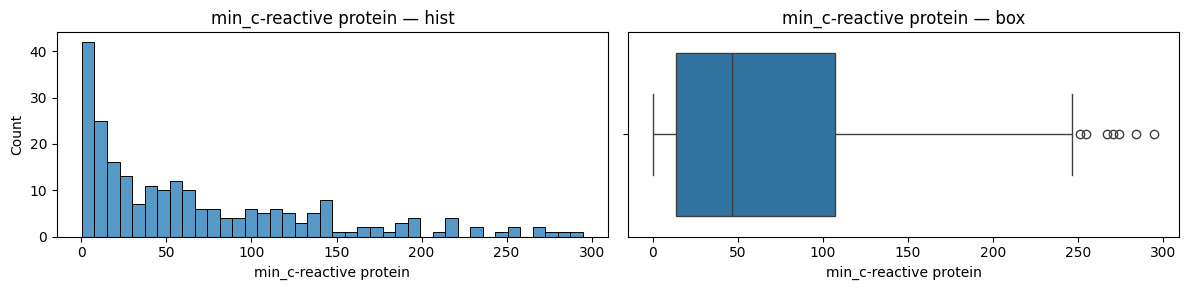

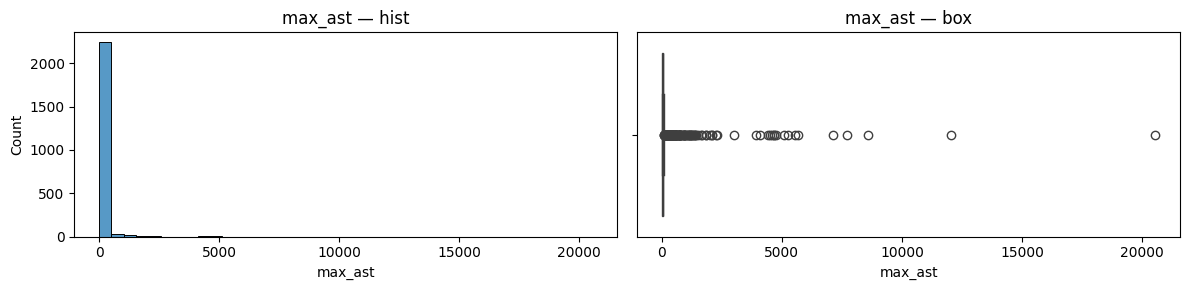

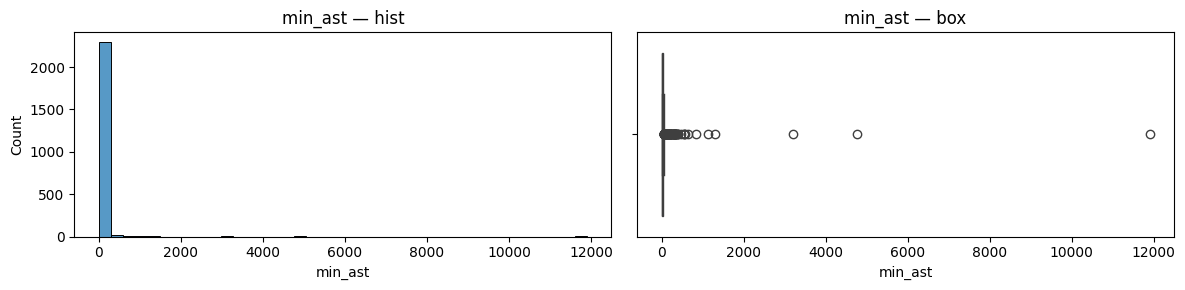

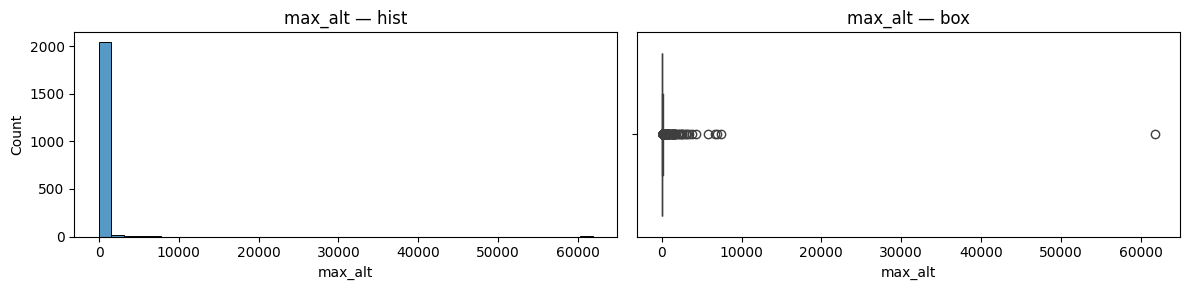

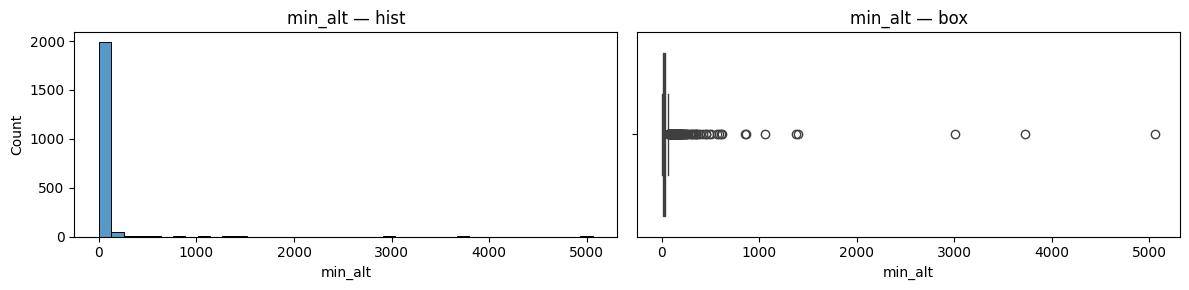

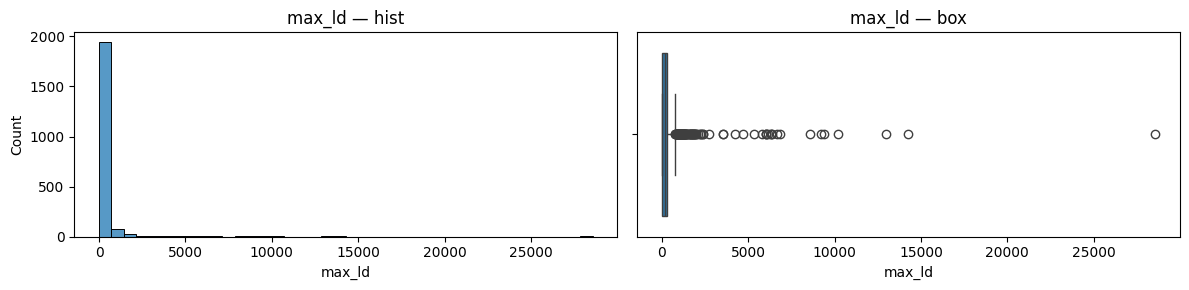

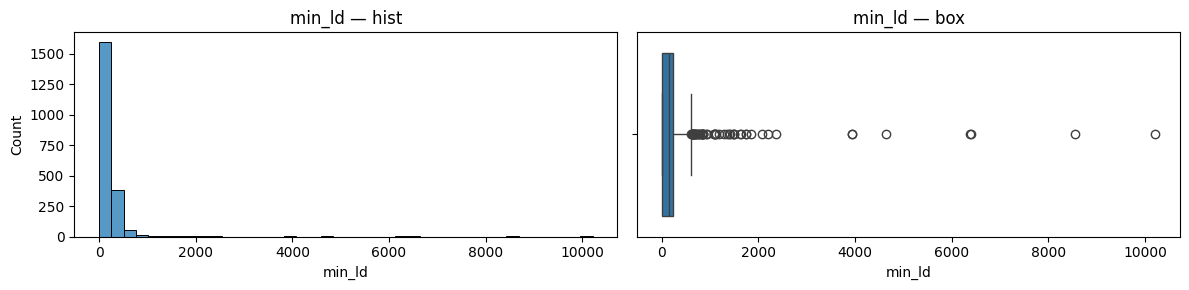

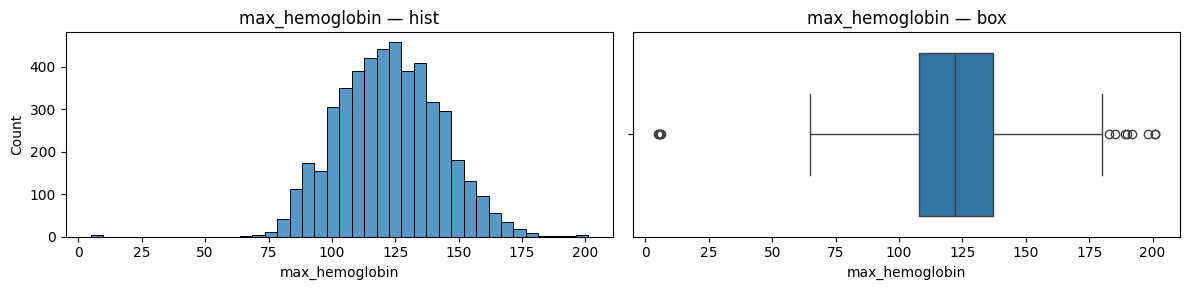

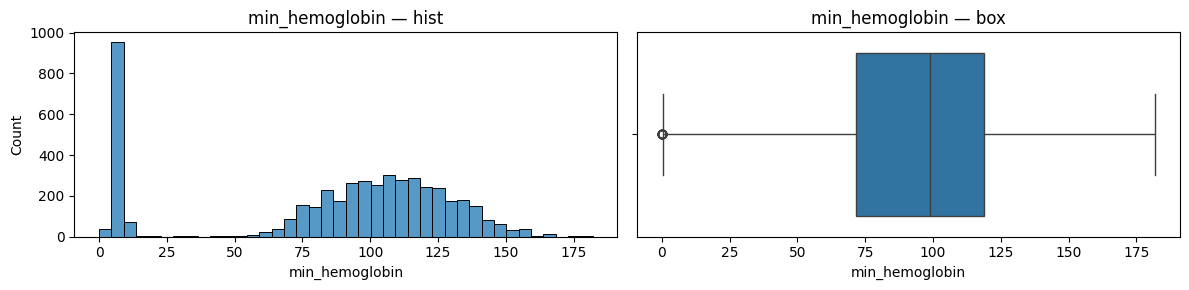

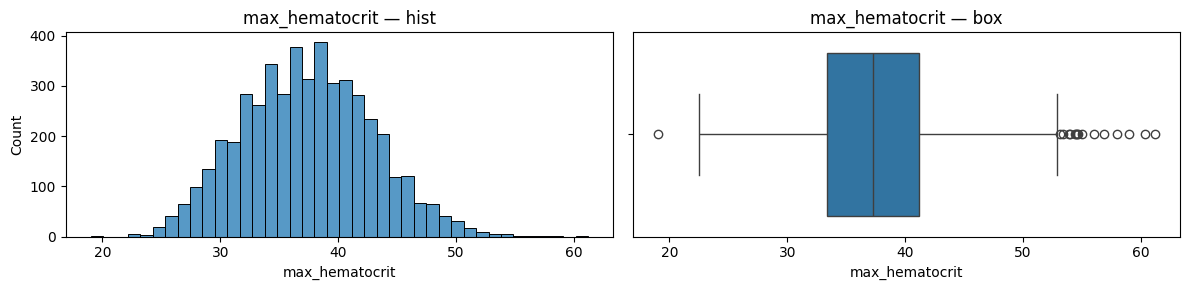

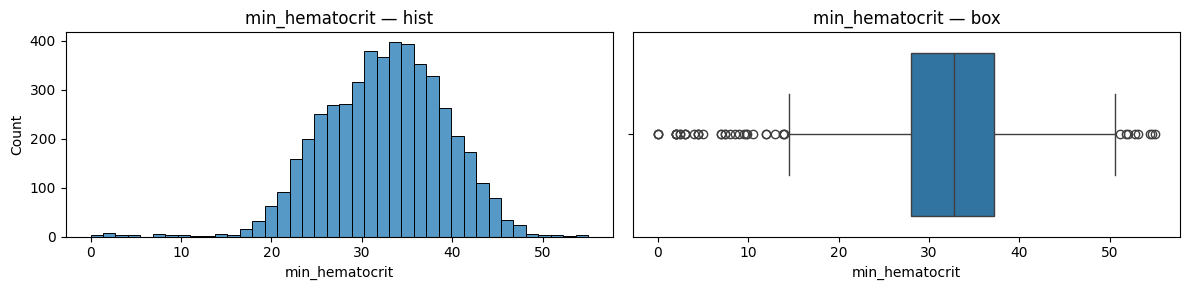

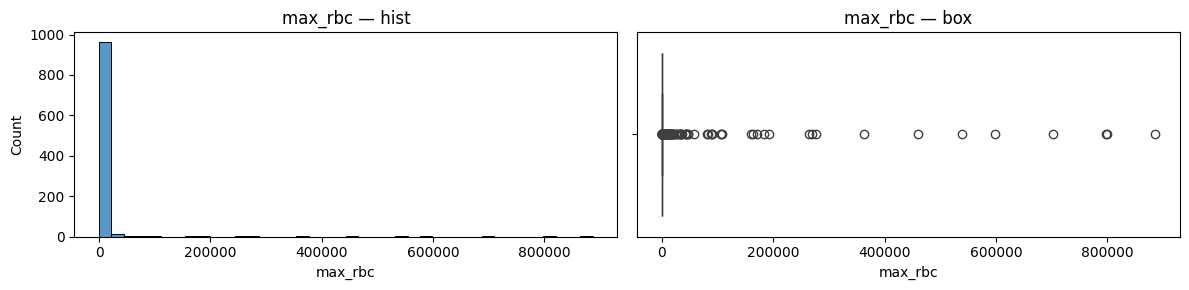

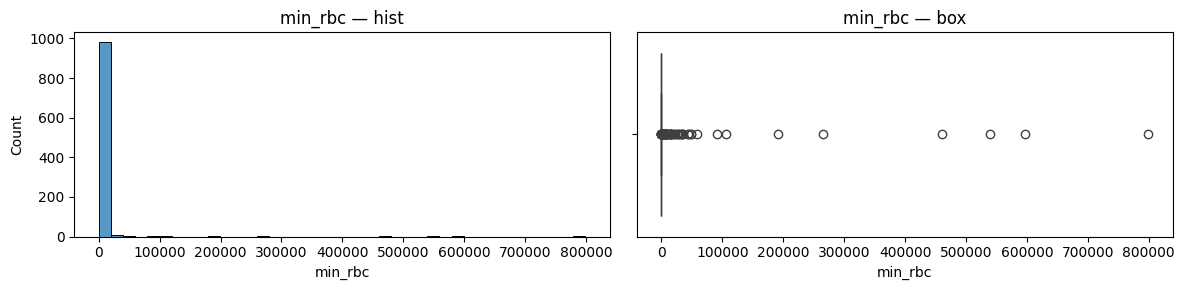

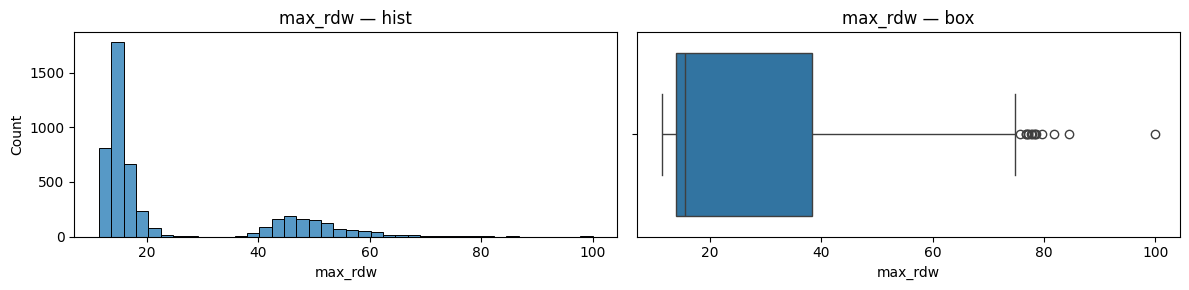

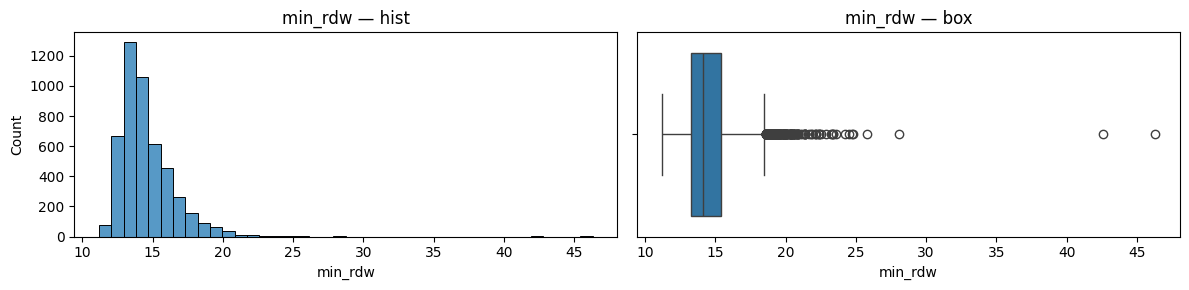

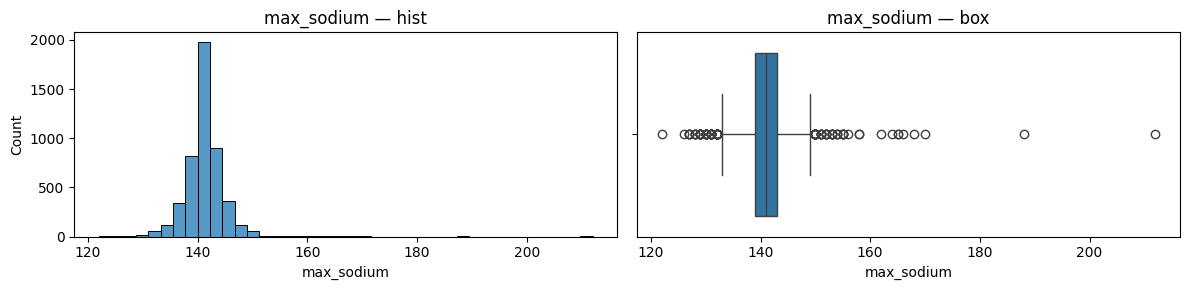

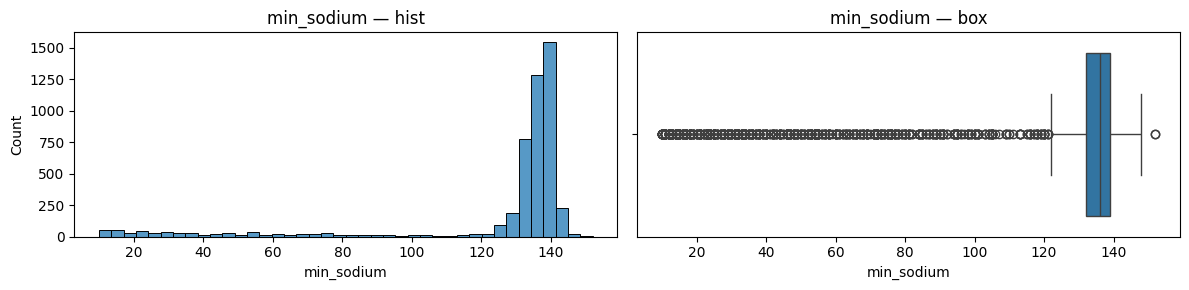

orig                                      \
                               mean           std       min         25%   
num_labs                 240.493306    513.277369    3.0000   79.000000   
abnormal_ratio             0.000086      0.000800    0.0000    0.000000   
qc_fail_ratio              0.020154      0.014587    0.0000    0.011236   
lab_time_span_hours      115.134343    111.872999    0.0000   44.233333   
unique_lab_tests          47.647168     21.559055    3.0000   31.000000   
has_labs                   1.000000      0.000000    1.0000    1.000000   
max_glucose               14.167228     31.014046    2.5530    6.382500   
min_glucose                5.463994      1.668278    0.0000    4.606500   
max_lactate              310.848738    969.969596    0.6000    2.600000   
min_lactate               97.590935    160.164612    0.2000    1.100000   
max_anion gap             16.602197      3.568343    6.0000   14.000000   
min_anion gap             12.003524      2.604759    3.0000   10.000000   
max_bicarbonate           29.212479      4.262854   10.0000   26.000000   
min_bicarbonate           24.109867      4.057992    5.0000   22.000000   
max_creatinine           161.365376    177.282305   17.6800   88.400000   
min_creatinine            98.487969     89.773155    0.1000   61.880000   
max_urea nitrogen         79.350656    203.855267    1.4280    6.783000   
min_urea nitrogen          8.466646     19.547678    1.0710    4.641000   
max_phosphate              1.632010      4.296401    0.4845    1.162800   
min_phosphate              1.020904      0.246979    0.2261    0.872100   
max_potassium              8.443458     12.952776    1.6000    4.300000   
min_potassium              3.754196      0.422435    1.5000    3.500000   
max_pO2                   42.633379     14.027261   20.0830   28.994000   
min_pO2                   27.224871      8.185391   20.0830   21.280000   
max_pCO2                  12.097885      1.798123   10.1080   10.773000   
min_pCO2                  11.335692      1.300362   10.1080   10.473750   
max_pH                    59.834020    105.329189    0.5168    1.356600   
min_pH                     1.148433      6.072649    0.0000    0.300000   
max_base excess            2.875104      4.981070  -15.0000    0.000000   
min_base excess           -0.946711      5.862067  -26.0000   -4.000000   
max_c-reactive protein    74.088841     72.093089    0.3000   13.800000   
min_c-reactive protein    68.647210     69.854967    0.3000   13.300000   
max_ast                  124.159302    686.496247    0.9000   20.000000   
min_ast                   40.691258    279.949558    0.9000   10.250000   
max_alt                  120.936077   1415.151066    2.0000   16.000000   
min_alt                   43.569007    168.778731    2.0000   15.000000   
max_ld                   328.057666   1009.147894    0.0000    3.431750   
min_ld                   182.979700    434.013957    0.0000    2.408700   
max_hemoglobin           122.663033     20.089755    4.8000  108.000000   
min_hemoglobin            85.390971     46.308441    0.0000   71.500000   
max_hematocrit            37.373451      5.519217   19.0000   33.400000   
min_hematocrit            32.514756      6.703981    0.0000   28.000000   
max_rbc                 8760.829681  62736.961835    0.0000    1.000000   
min_rbc                 3819.909363  40348.783846    0.0000    1.000000   
max_rdw                   23.993073     15.799367   11.4000   14.000000   
min_rdw                   14.557416      1.908098   11.2000   13.300000   
max_sodium               141.070851      3.640490  122.0000  139.000000   
min_sodium               124.630619     31.924754   10.0000  132.000000   

                                                                      wins  \
                               50%         75%            max         mean   
num_labs                136.000000  259.000000   22580.000000   220.828630   
abnormal_ratio            0.000000    0.000000

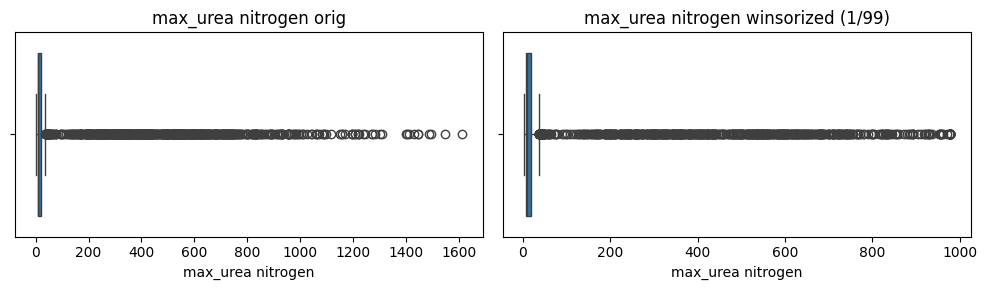

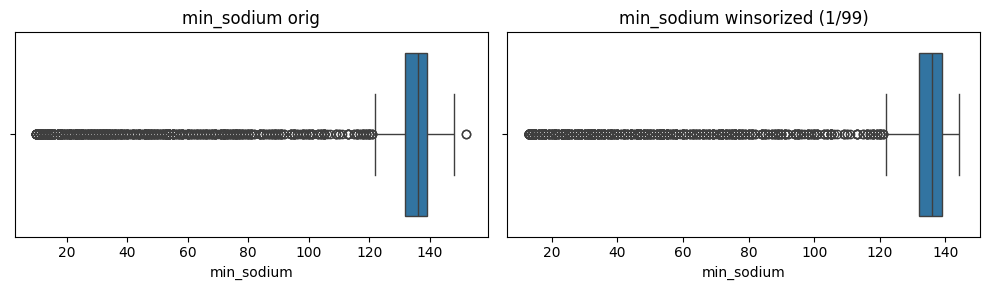

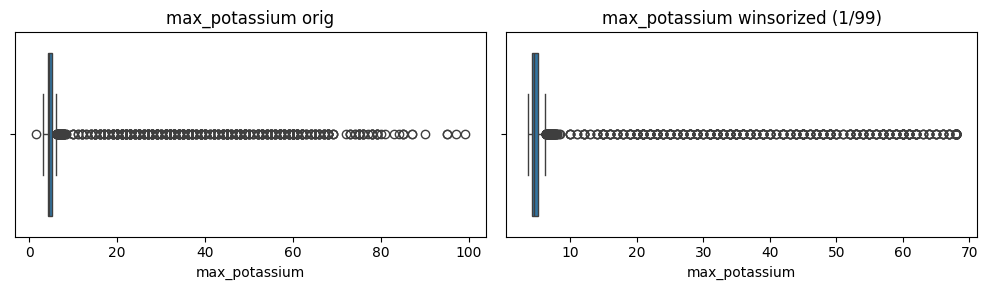

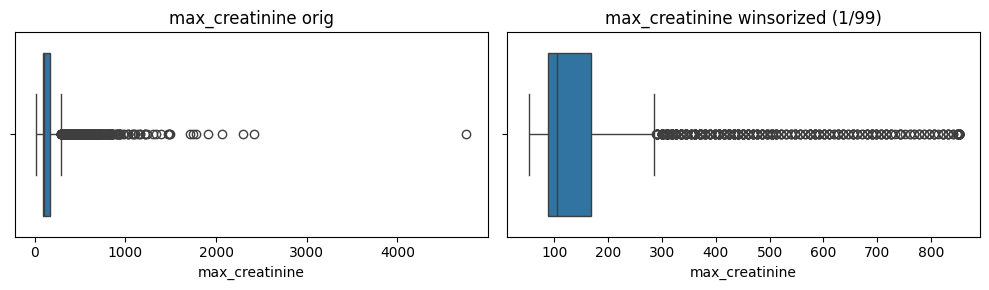

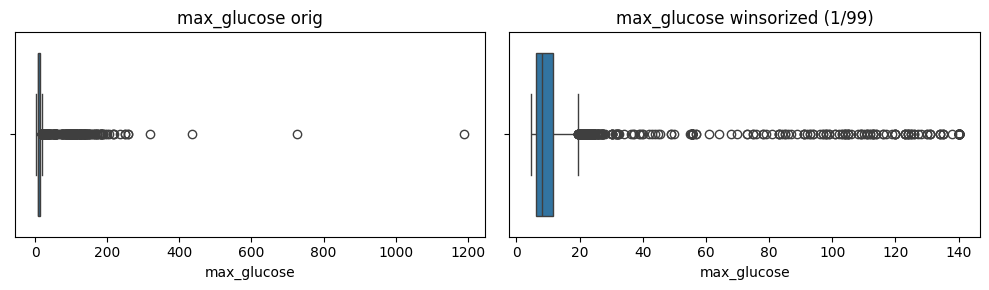

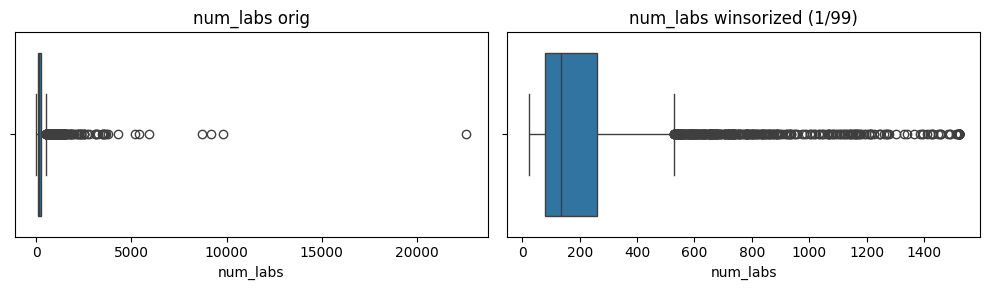


Notes:
- Review 'n_outliers' and 'frac_outliers' in summary_df to decide aggressiveness.
- Adjust winsorize_df lower_pct/upper_pct (e.g., 0.005/0.995) or use IQR-based clipping using lower_th/upper_th.


In [325]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

numeric_cols = [c for c in feat_reduced.select_dtypes(include=[np.number]).columns if c not in ('subject_id','hadm_id')]
print("Numeric features:", numeric_cols)

# Summary table with percentiles and outlier thresholds
summary = []
for c in numeric_cols:
    s = feat_reduced[c].dropna()
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower_th = q1 - 1.5 * iqr
    upper_th = q3 + 1.5 * iqr
    p01, p99 = s.quantile(0.01), s.quantile(0.99)
    n = len(s)
    n_out = ((s < lower_th) | (s > upper_th)).sum()
    summary.append((c, n, s.min(), s.median(), s.max(), q1, q3, iqr, lower_th, upper_th, p01, p99, n_out, n_out / max(1,n)))
summary_df = pd.DataFrame(summary, columns=[
    'feature','n','min','median','max','q1','q3','iqr','lower_th','upper_th','p01','p99','n_outliers','frac_outliers'])
display(summary_df.sort_values('frac_outliers', ascending=False))

# Plot each feature: histogram + boxplot (compact)
plots_dir = os.path.join(os.path.abspath('.'), 'plots')
os.makedirs(plots_dir, exist_ok=True)
for c in numeric_cols:
    s = feat_reduced[c]
    fig, axes = plt.subplots(1,2, figsize=(12,3))
    sns.histplot(s.dropna(), bins=40, ax=axes[0], kde=False)
    axes[0].set_title(f"{c} — hist")
    sns.boxplot(x=s.dropna(), ax=axes[1], orient='h')
    axes[1].set_title(f"{c} — box")
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, f"dist_{c}.png"), dpi=120, bbox_inches='tight')
    plt.show()

# Winsorization helper (in-place on copy)
def winsorize_df(df, cols, lower_pct=0.01, upper_pct=0.99):
    out = df.copy()
    for c in cols:
        if c not in out.columns: 
            continue
        lower = out[c].quantile(lower_pct)
        upper = out[c].quantile(upper_pct)
        out[c] = out[c].clip(lower=lower, upper=upper)
    return out

# Create winsorized version and compare summaries for a few features
feat_wins = winsorize_df(feat_reduced, numeric_cols, lower_pct=0.01, upper_pct=0.99)
comp = pd.concat([feat_reduced[numeric_cols].describe().T[['mean','std','min','25%','50%','75%','max']],
                  feat_wins[numeric_cols].describe().T[['mean','std','min','25%','50%','75%','max']]],
                 axis=1, keys=['orig','wins'])
display(comp)

# small visual comparison for top 6 features with most outliers
top = summary_df.sort_values('n_outliers', ascending=False).head(6)['feature'].tolist()
for c in top:
    fig, axes = plt.subplots(1,2, figsize=(10,3))
    sns.boxplot(x=feat_reduced[c].dropna(), ax=axes[0], orient='h').set_title(f"{c} orig")
    sns.boxplot(x=feat_wins[c].dropna(), ax=axes[1], orient='h').set_title(f"{c} winsorized (1/99)")
    plt.tight_layout(); plt.show()

# Print instructions summary
print("\nNotes:\n- Review 'n_outliers' and 'frac_outliers' in summary_df to decide aggressiveness.\n- Adjust winsorize_df lower_pct/upper_pct (e.g., 0.005/0.995) or use IQR-based clipping using lower_th/upper_th.")